In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import string
import statistics as stat
import nltk
from nltk.corpus import cess_esp
from nltk.corpus import words as english_dict
from scipy.stats import mannwhitneyu,kruskal
from scikit_posthocs import posthoc_dunn

## CHARACTER BASED FEATURES ANALYSIS: 

1. Number of characters
2. Number of capital letters
3. Number of punctuation marks

#### Steps:

- Create boxplots to visualize independence between studied features and the users personal traits (gender, age and demography)
- Statistical measures: d of Cohen for traits with only 2 options, f of Cohen for traits with more than 2 possibilities.
The d of Cohen can be either positive or negative. Two variables are considered independant when the absolute value of d is 0 or very close to 0, and as the absolute value of d gets bigger, the relationship between the variables becomes stronger. Normaly, when the value is below 0.2 the dependency between the variables is considered small, when it is around 0.5 it's considered moderate, and the dependency is big when the value is greater than 0.8. These measures apply as well for the f of Cohen normilized. This measure is calculated dividing the f of Cohen between the difference of the max and min values of the groups of each of the studied features.

In [8]:
# load data for character based features analysis
def df_character_based():    
    data = pd.read_excel('../cleaned_users.xlsx')
    username_list = data['username']

    punctuation_list = list(string.punctuation)

    num_char = []
    num_capital = []
    num_punctuation = []

    for username in username_list:
        with open(f'../Cleaned Documents/{username}.txt','r') as f:
            text = f.read()
            num_char.append(len(text))
            num_capital.append(sum(1 for c in text if c.isupper()))
            num_punctuation.append(sum(1 for c in text if c in punctuation_list))

    data['characters'] = num_char
    data['capital_letters'] = num_capital
    data['punctuations'] = num_punctuation

    return data

In [9]:
data = df_character_based()
data.head()

,username,gender,age,region,characters,capital_letters,punctuations
0,lozanogarcia68,female,55+,Madrid,5731,233,390
1,beltrangmodet,male,18-24,Madrid,554,38,16
2,edubellver,male,18-24,Madrid,869,17,42
3,luss_27,female,18-24,Madrid,7044,362,437
4,k15ce,male,25-34,Madrid,7117,299,333


In [4]:
def remove_outliers(data,column,value=None):
    outliers_index = np.where(data[column] > value)
    data.drop(outliers_index[0], inplace=True)
    data.reset_index(drop=True,inplace=True)

    return data

def box_plot(column,data):
    fig,ax = plt.subplots(1,3,figsize=(15,7))

    sns.boxplot(x='gender',y=column,data=data,ax=ax[0])
    sns.boxplot(x='age',y=column,data=data,ax=ax[1],order=['18-24','25-34','35-44','45-54','55+'])
    sns.boxplot(x='region',y=column,data=data,ax=ax[2])
    plt.xticks(rotation=65)

def mann_whitney(df,column):
    # Mann-Whitney U test
    fem_df = df.loc[df['gender'] == 'female'][column].tolist()
    male_df = df.loc[df['gender'] == 'male'][column].tolist()

    res = mannwhitneyu(fem_df,male_df)
    return res

def kruskal_posthoc(df,column):
    # Kruskal-Wallis test
    df_aux = df.copy()
    df_aux = df_aux.groupby('age')[column]
    data = [df_aux.get_group(x).tolist() for x in df_aux.groups]

    data1 = df_aux.get_group('18-24').tolist()
    data2 = df_aux.get_group('25-34').tolist()
    data3 = df_aux.get_group('35-44').tolist()
    data4 = df_aux.get_group('45-54').tolist()
    data5 = df_aux.get_group('55+').tolist()

    res = kruskal(data1,data2,data3,data4,data5)
    print(f'AGE: {res}')

    posthoc = posthoc_dunn(data,p_adjust='holm')
    posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
    posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
    print(f'AGE: {posthoc}')

    # REGION
    df_aux = df.copy()
    df_aux = df_aux.groupby('region')[column]
    data = [df_aux.get_group(x).tolist() for x in df_aux.groups]

    data1 = df_aux.get_group('Madrid').tolist()
    data2 = df_aux.get_group('Andalucia').tolist()
    data3 = df_aux.get_group('Extremadura').tolist()
    data4 = df_aux.get_group('Canarias').tolist()
    data5 = df_aux.get_group('Castilla y Leon').tolist()
    data6 = df_aux.get_group('Valencia').tolist()
    data7 = df_aux.get_group('Galicia').tolist()
    data8 = df_aux.get_group('Catalunya').tolist()
    data9 = df_aux.get_group('La Rioja').tolist()
    data10 = df_aux.get_group('Pais Vasco').tolist()
    data11 = df_aux.get_group('Castilla-La Mancha').tolist()
    data12 = df_aux.get_group('Asturias').tolist()
    data13 = df_aux.get_group('Aragon').tolist()
    data14 = df_aux.get_group('Cantabria').tolist()
    data15 = df_aux.get_group('Murcia').tolist()
    data16 = df_aux.get_group('Navarra').tolist()

    res = kruskal(data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16)
    print(f'REGION: {res}')

    posthoc = posthoc_dunn(data,p_adjust='holm')
    posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La Rioja','Pais Vasco','Castilla-La Mancha','Asturias','Aragon','Cantabria','Murcia','Navarra'],axis=0,inplace=True)
    posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La Rioja','Pais Vasco','Castilla-La Mancha','Asturias','Aragon','Cantabria','Murcia','Navarra'],axis=1,inplace=True)
    print(f'REGION: {posthoc}')

def d_cohen(mean1, mean2, std):
    return (mean1 - mean2)/std

def f_cohen(mean_list,count_list,total_mean):

    suma = 0
    for mean, count in zip(mean_list,count_list):
        suma += count * math.pow((mean - total_mean),2)

    return math.sqrt(suma/len(data))

def statistics(column,data):
    # d of Cohen
    mean_col = data[column].mean()
    std_col = data[column].std()
    # gender
    mean_gender = data.groupby(['gender'])[column].mean()

    d_gender = d_cohen(mean_gender['female'],mean_gender['male'],std_col)
    print(f'The d of Cohen for gender is: {d_gender}')

    # f of Cohen
    # age
    mean_age = data.groupby(['age'])[column].mean()
    count_age = data.groupby(['age'])[column].count()
    f_cohen_age = f_cohen(mean_age,count_age,mean_col)
    f_cohen_age_normalized = f_cohen_age/(max(mean_age) - min(mean_age))
    print(f'The f of Cohen for age is: {f_cohen_age}')
    print(f'The f of Cohen normalized for age is: {f_cohen_age_normalized}')

    # demography
    mean_dem = data.groupby(['region'])[column].mean()
    count_dem = data.groupby(['region'])[column].count()
    f_cohen_dem = f_cohen(mean_dem,count_dem,mean_col)
    f_cohen_dem_normalized = f_cohen_dem/(max(mean_dem) - min(mean_dem))
    print(f'The f of Cohen for demography is: {f_cohen_dem}')
    print(f'The f of Cohen normalized for demography is: {f_cohen_dem_normalized}')
    

### 1. Number of characters 

In [10]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'characters')
print(res)

MannwhitneyuResult(statistic=141831.5, pvalue=9.366289279612853e-05)


In [11]:
# Kruskal-Wallis test
kruskal_posthoc(df,'characters')


AGE: KruskalResult(statistic=329.6433771399726, pvalue=4.350022360287948e-70)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  2.836364e-16  1.658603e-39  4.131969e-50  8.105487e-56
25-34  2.836364e-16  1.000000e+00  2.038841e-06  2.500687e-10  1.096022e-13
35-44  1.658603e-39  2.038841e-06  1.000000e+00  3.243564e-01  2.516314e-02
45-54  4.131969e-50  2.500687e-10  3.243564e-01  1.000000e+00  3.243564e-01
55+    8.105487e-56  1.096022e-13  2.516314e-02  3.243564e-01  1.000000e+00
REGION: KruskalResult(statistic=65.16919915588885, pvalue=3.1913625856430235e-08)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.200826     1.000000  0.366798   
Andalucia           0.200826   1.000000     0.334549  1.000000   
Extremadura         1.000000   0.334549     1.000000  0.601142   
Canarias            0.366798   1.000000     0.601142  1.000000   
Castilla y Leon     0.000054   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.22859986286099168
The f of Cohen for age is: 2817.626548685947
The f of Cohen normalized for age is: 0.3387623821526336
The f of Cohen for demography is: 1381.4049914155355
The f of Cohen normalized for demography is: 0.2494618658789483


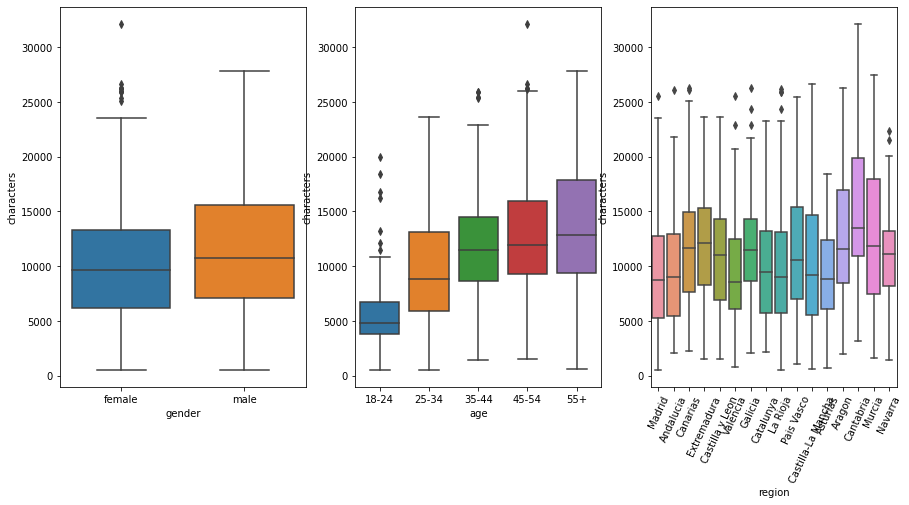

In [5]:
# remove outliers
data = df_character_based()
#data = remove_outliers(data,column='characters',value=2700)
# boxplot
box_plot('characters',data)
# statistics
statistics('characters',data)

#### Conclusions
- The variables *gender* and *num of words* are ***INDEPENDENT***: the statistical measure, d of Cohen, is close to 0 and we can observe in the plot that the boxes are similar.
- The variables *age* and *num of words* are ***DEPENDANT***: the f of Cohen isn't close to 0, and we can see how the eldest users (>35 years) use more mentions than the youngest users. 
- The variables *demography* and *num of words* are ***DEPENDAT***: the f of Cohen isn't close to 0, but it is smaller than the latter. We can see that users from regions, such as *Cantabria, Murcia, Canarias or Extremadura* have longer documents (meaning they use more words in their tweets) than users frm *Madrid, Andalucia or Valencia*

### 2. Number of capital letters 

In [12]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'capital_letters')
print(res)

MannwhitneyuResult(statistic=142296.5, pvalue=0.0001316598899689472)


In [13]:
# Kruskal-Wallis test
kruskal_posthoc(df,'capital_letters')


AGE: KruskalResult(statistic=273.4176561297529, pvalue=5.8488721238507444e-58)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.056524e-10  2.201080e-28  2.040203e-40  1.647607e-46
25-34  1.056524e-10  1.000000e+00  1.228633e-05  5.907913e-11  7.650308e-15
35-44  2.201080e-28  1.228633e-05  1.000000e+00  8.838336e-02  2.356149e-03
45-54  2.040203e-40  5.907913e-11  8.838336e-02  1.000000e+00  1.478269e-01
55+    1.647607e-46  7.650308e-15  2.356149e-03  1.478269e-01  1.000000e+00
REGION: KruskalResult(statistic=53.16401393253149, pvalue=3.621215688040059e-06)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   1.000000     1.000000  1.000000   
Andalucia           1.000000   1.000000     0.013678  1.000000   
Extremadura         1.000000   0.013678     1.000000  0.026729   
Canarias            1.000000   1.000000     0.026729  1.000000   
Castilla y Leon     0.070341   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.19636757240354516
The f of Cohen for age is: 90.25525591128496
The f of Cohen normalized for age is: 0.34521089196062466
The f of Cohen for demography is: 40.20817790074906
The f of Cohen normalized for demography is: 0.2913080572408892


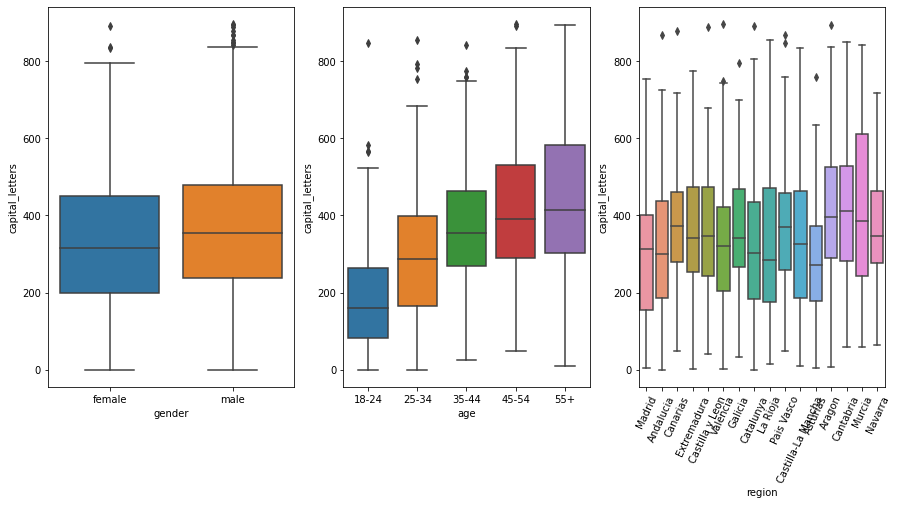

In [7]:
# remove outliers
data = remove_outliers(data,column='capital_letters',value=900)
# boxplot
box_plot('capital_letters',data)
# statistics
statistics('capital_letters',data)

#### Conclusions
- The variables *gender* and *num of capital letters* are ***INDEPENDENT***: the statistical measure, d of Cohen, is close to 0 and we can observe in the plot that the boxes are similar.
- The variables *age* and *num of capital letters* are ***DEPENDANT***: the f of Cohen isn't close to 0, and we can see how the eldest users (>35 years) use more capital letters than the youngest users. 
- The variables *demography* and *num of capital letters* are ***DEPENDAT***: the f of Cohen isn't close to 0, but it is smaller than the latter. We can see that users from regions, such as *Aragon or Cantabria* use more capital letters than users from *Asturias or La Rioja*

### 3. Number of puntuation marks 

In [14]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'punctuations')
print(res)

MannwhitneyuResult(statistic=159525.0, pvalue=0.45723294897784494)


In [15]:
# Kruskal-Wallis test
kruskal_posthoc(df,'punctuations')


AGE: KruskalResult(statistic=268.9781822816959, pvalue=5.297051201809193e-57)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  2.128437e-14  5.518383e-41  2.387461e-44  5.427506e-36
25-34  2.128437e-14  1.000000e+00  2.502436e-08  3.401624e-09  4.344271e-06
35-44  5.518383e-41  2.502436e-08  1.000000e+00  8.744767e-01  6.653863e-01
45-54  2.387461e-44  3.401624e-09  8.744767e-01  1.000000e+00  6.653863e-01
55+    5.427506e-36  4.344271e-06  6.653863e-01  6.653863e-01  1.000000e+00
REGION: KruskalResult(statistic=51.21419992958206, pvalue=7.6130382832791845e-06)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   1.000000     1.000000  1.000000   
Andalucia           1.000000   1.000000     1.000000  1.000000   
Extremadura         1.000000   1.000000     1.000000  0.941818   
Canarias            1.000000   1.000000     0.941818  1.000000   
Castilla y Leon     0.167651   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.00733947394253238
The f of Cohen for age is: 86.82657841496393
The f of Cohen normalized for age is: 0.3580564100213945
The f of Cohen for demography is: 39.943664271837605
The f of Cohen normalized for demography is: 0.3097204461585252


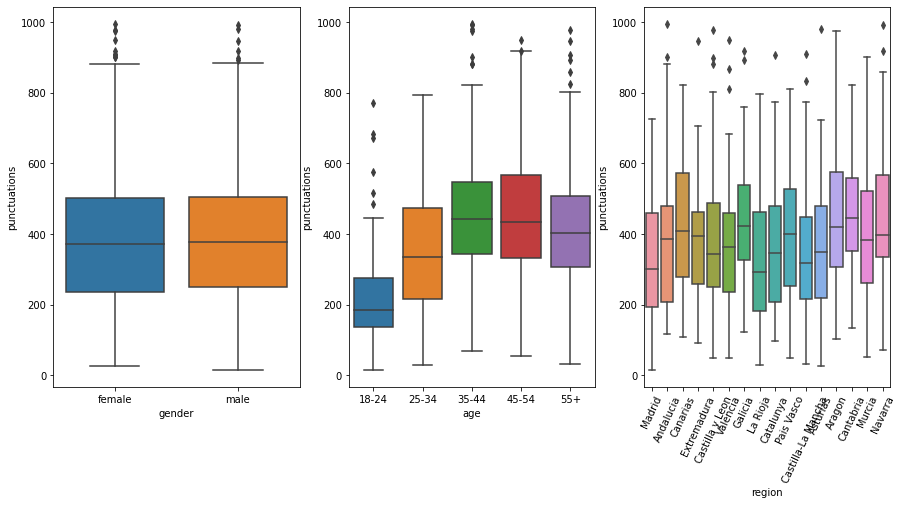

In [8]:
# remove outliers
data = remove_outliers(data,column='punctuations',value=1000)
# boxplot
box_plot('punctuations',data)
# statistics
statistics('punctuations',data)

#### Conclusions
- The variables *gender* and *num of punctuation marks* are ***INDEPENDENT***: the statistical measure, d of Cohen, is practically 0 and we can observe in the plot that the boxes are identical.
- The variables *age* and *num of punctuation marks* are ***DEPENDANT***: the f of Cohen isn't close to 0, and we can see how the eldest users (>35 years) use more capital letters than the youngest users (specially 18-24 years). 
- The variables *demography* and *num of punctuation marks* are ***DEPENDAT***: the f of Cohen isn't close to 0, but it is smaller than the latter. We can see that users from regions, such as *Aragon, Cantabira or Cantabria* use more capital letters than users from *Castilla-La Mancha or La Rioja*

## STRUCTURAL FEATURES ANALYSIS: 

1. Sentence count
2. Average count of sentence per paragraph
3. Average count of words per paragraph
4. Average count of characters per paragraph
5. Variation in tweets length 

#### Steps:

- Create boxplots to visualize independence between studied features and the users personal traits (gender, age and demography)
- Statistical measures: d of Cohen for traits with only 2 options, f of Cohen for traits with more than 2 possibilities.
The d of Cohen can be either positive or negative. Two variables are considered independant when the absolute value of d is 0 or very close to 0, and as the absolute value of d gets bigger, the relationship between the variables becomes stronger. Normaly, when the value is below 0.2 the dependency between the variables is considered small, when it is around 0.5 it's considered moderate, and the dependency is big when the value is greater than 0.8. These measures apply as well for the f of Cohen normilized. This measure is calculated dividing the f of Cohen between the difference of the max and min values of the groups of each of the studied features.

In [16]:
# load data for character based features analysis
def df_structural_based():    
    data = pd.read_excel('../cleaned_users.xlsx')
    username_list = data['username']

    num_sentence = []
    av_sentence_par = []
    av_words_par = []
    av_char_par = []
    variation = []

    for username in username_list:
        with open(f'../Cleaned Documents/{username}.txt','r') as f:
            text = f.read()
            num_par = len(text.split('\n'))

            sentences = text.split('.')
            num_sentence_user = len(sentences)
            num_sentence.append(num_sentence_user)
            av_sentence_par.append(num_sentence_user/num_par)
            
            words = [w for w in text.split(' ') if len(w) > 0]
            num_words = len(words)
            av_words_par.append(num_words/num_par)
            av_char_par.append(len(text)/num_par)

            len_sentence_list = [len(sentence) for sentence in sentences]
            variation.append(stat.variance(len_sentence_list))     

    data['num_sentence'] = num_sentence
    data['av_sentence_par'] = av_sentence_par
    data['av_words_par'] = av_words_par
    data['av_char_par'] = av_char_par
    data['variation'] = variation

    return data

In [17]:
data = df_structural_based()
data.head()

,username,gender,age,region,num_sentence,av_sentence_par,av_words_par,av_char_par,variation
0,lozanogarcia68,female,55+,Madrid,208,4.160000,17.220000,114.620000,2318.557042
1,beltrangmodet,male,18-24,Madrid,12,1.200000,9.400000,55.400000,1453.295455
2,edubellver,male,18-24,Madrid,23,1.000000,5.521739,37.782609,558.695652
3,luss_27,female,18-24,Madrid,175,1.535088,9.429825,61.789474,1961.916256
4,k15ce,male,25-34,Madrid,224,2.055046,10.000000,65.293578,1138.236947


### 1. Number of sentences

In [18]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_sentence')
print(res)

MannwhitneyuResult(statistic=123116.0, pvalue=4.0976684127885116e-13)


In [23]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_sentence')


AGE: KruskalResult(statistic=199.21933001046614, pvalue=5.529830848979136e-42)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  3.218733e-11  1.061632e-28  1.718978e-28  1.110255e-33
25-34  3.218733e-11  1.000000e+00  3.211986e-05  8.731150e-05  2.472522e-07
35-44  1.061632e-28  3.211986e-05  1.000000e+00  6.812963e-01  6.812963e-01
45-54  1.718978e-28  8.731150e-05  6.812963e-01  1.000000e+00  4.726716e-01
55+    1.110255e-33  2.472522e-07  6.812963e-01  4.726716e-01  1.000000e+00
REGION: KruskalResult(statistic=37.200377121250256, pvalue=0.0011829457821461197)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0   1.000000          1.0  1.000000         1.000000   
Andalucia              1.0   1.000000          1.0  1.000000         1.000000   
Extremadura            1.0   1.000000          1.0  1.000000         1.000000   
Canarias               1.0   1.000000         

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.3986932922918319
The f of Cohen for age is: 25.859568295988627
The f of Cohen normalized for age is: 0.3504280479022301
The f of Cohen for demography is: 11.979844063886018
The f of Cohen normalized for demography is: 0.2535926262183803


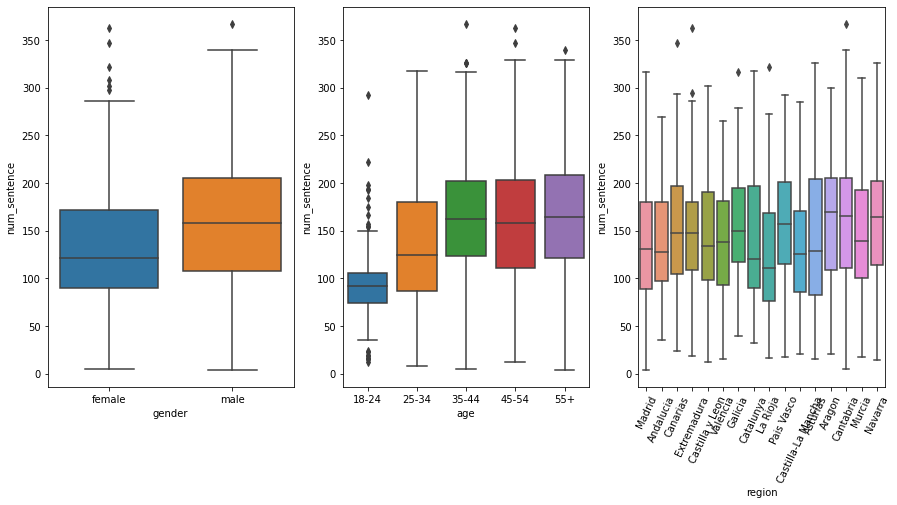

In [11]:
# remove outliers
data = remove_outliers(data,column='num_sentence',value=370)
# boxplot
box_plot('num_sentence',data)
# statistics
statistics('num_sentence',data)

#### Conclusions
- The variables *gender* and *num of sentences* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is close to 0.5 therefore we consider their relation as moderate. We can also see in the plot that the average number of sentences used by males and females differ in a hundred.
- The variables *age* and *num of sentences* have ***MODERATE DEPENDENCY***: the f of Cohen isn't close to 0, but it isn't as big as in other features. We can see how the eldest users (>35 years) use more sentences than the youngest users (specially 18-24 years). 
- The variables *demography* and *num of sentences* have ***LOW DEPENDENCY***: the f of Cohen isn't close to 0, but it is smaller than the latter. We can see that users from regions, such as *Aragon or Pais Vasco* use more sentences than users from *Catalunya or La Rioja*

### 2. Average number of sentences per paragraph

In [20]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'av_sentence_par')
print(res)

MannwhitneyuResult(statistic=135083.0, pvalue=3.172965185607222e-07)


In [22]:
# Kruskal-Wallis test
kruskal_posthoc(df,'av_sentence_par')


AGE: KruskalResult(statistic=71.44521598033951, pvalue=1.1240923372487926e-14)
AGE:               18-24     25-34         35-44         45-54           55+
18-24  1.000000e+00  0.000027  1.114806e-14  3.009590e-09  3.928593e-09
25-34  2.677707e-05  1.000000  2.855679e-03  3.358113e-01  3.358113e-01
35-44  1.114806e-14  0.002856  1.000000e+00  1.785474e-01  2.028790e-01
45-54  3.009590e-09  0.335811  1.785474e-01  1.000000e+00  9.246207e-01
55+    3.928593e-09  0.335811  2.028790e-01  9.246207e-01  1.000000e+00
REGION: KruskalResult(statistic=28.42774109629103, pvalue=0.019039852459406096)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0   1.000000     1.000000  1.000000              1.0   
Andalucia              1.0   1.000000     1.000000  1.000000              1.0   
Extremadura            1.0   1.000000     1.000000  1.000000              1.0   
Canarias               1.0   1.000000     1.000000  1.000000            

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.29787471138575017
The f of Cohen for age is: 0.10612883174337179
The f of Cohen normalized for age is: 0.3325565946212125
The f of Cohen for demography is: 0.07402552104619106
The f of Cohen normalized for demography is: 0.25025526402592596


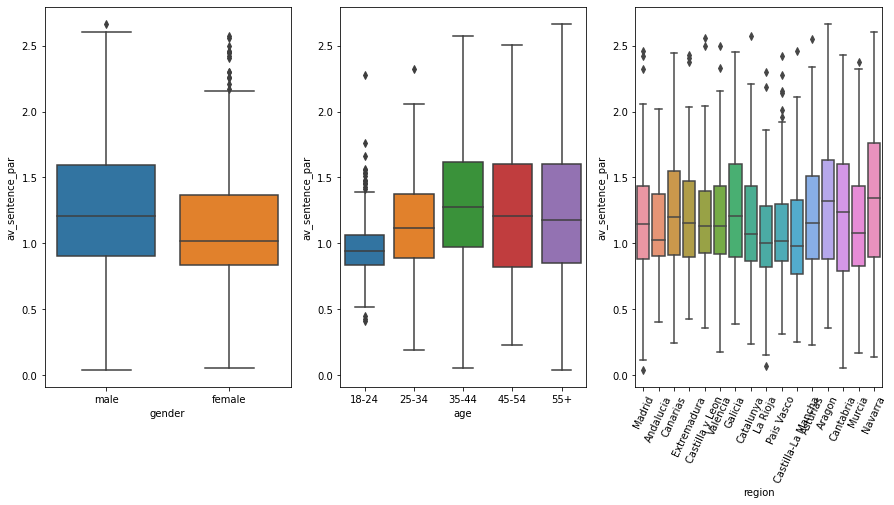

In [12]:
# remove outliers
data = remove_outliers(data,column='av_sentence_par',value=2.75)
# boxplot
box_plot('av_sentence_par',data)
# statistics
statistics('av_sentence_par',data)

#### Conclusions
- The variables *gender* and *average count of sentence per paragraph* have ***LOW DEPENDENCY***: the statistical measure, d of Cohen, is close to 0.3 therefore we consider their relation as low. We can also see in the plot that males have a bigger measure of average of sentences per paragraph, meaning they write more sentence in a paragraph than female users.
- The variables *age* and *average count of sentence per paragraph* have ***MODERATE DEPENDENCY***: the f of Cohen is between 0.2 and 0.5 and we can see how the eldest users (>35 years) write more sentences per paragraph than the youngest users (specially 18-24 years). 
- The variables *demography* and *num of sentences* have ***MODERATE DEPENDANCY***: the f of Cohen is slightly above 0.2 and we can see that the boxes of the users from *Navarra* use more sentences than the ones from *La Rioja*.

### 3. Average number of words per paragraph

In [24]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'av_words_par')
print(res)

MannwhitneyuResult(statistic=141298.0, pvalue=6.28569643460099e-05)


In [25]:
# Kruskal-Wallis test
kruskal_posthoc(df,'av_words_par')


AGE: KruskalResult(statistic=213.8723730133452, pvalue=3.9027555888206965e-45)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  4.978542e-14  1.231858e-30  1.190849e-34  3.938107e-34
25-34  4.978542e-14  1.000000e+00  2.651880e-04  2.497349e-05  2.058739e-05
35-44  1.231858e-30  2.651880e-04  1.000000e+00  1.000000e+00  1.000000e+00
45-54  1.190849e-34  2.497349e-05  1.000000e+00  1.000000e+00  1.000000e+00
55+    3.938107e-34  2.058739e-05  1.000000e+00  1.000000e+00  1.000000e+00
REGION: KruskalResult(statistic=58.133437215162985, pvalue=5.264692750116944e-07)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.082961     0.367876  0.001739   
Andalucia           0.082961   1.000000     1.000000  1.000000   
Extremadura         0.367876   1.000000     1.000000  1.000000   
Canarias            0.001739   1.000000     1.000000  1.000000   
Castilla y Leon     0.001343   1.000000 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.2509589916941683
The f of Cohen for age is: 1.9078393772465816
The f of Cohen normalized for age is: 0.36779163580744345
The f of Cohen for demography is: 1.0441655113507764
The f of Cohen normalized for demography is: 0.23490824596296908


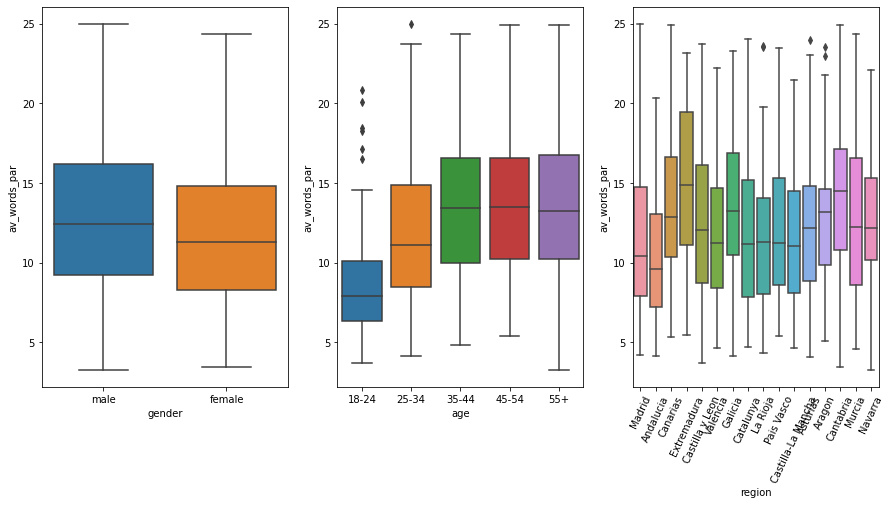

In [13]:
# remove outliers
data = remove_outliers(data,column='av_words_par',value=25)
# boxplot
box_plot('av_words_par',data)
# statistics
statistics('av_words_par',data)

#### Conclusions
- The variables *gender* and *average count of words per paragraph* have ***LOW DEPENDENCY***: the statistical measure, d of Cohen, is close to 0.2 therefore we consider their relation as low. We can also see in the plot that males have a bigger measure of average of words per paragraph, meaning they write more words in a paragraph than female users.
- The variables *age* and *average count of words per paragraph* have ***MODERATE DEPENDENCY***: the f of Cohen is close to 0, but if we normalise this result, we can see that the relationship is moderate. We can see how the eldest users (>35 years) write more words per paragraph than the youngest users (specially 18-24 years). 
- The variables *demography* and *average count of words per paragraph* have ***LOW DEPENDENCY***: the f of Cohen is close to 0 but as in the latter, if we normalise this value we can notice the relationship. We can appreciate in the plot that users from regions like *Extremadura, Cantabria or Canarias* write more words per paragraph than users from *Andalucia or Madrid*

### 4. Average number of characters per paragraph

In [26]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'av_char_par')
print(res)

MannwhitneyuResult(statistic=151121.5, pvalue=0.02472394168318719)


In [27]:
# Kruskal-Wallis test
kruskal_posthoc(df,'av_char_par')


AGE: KruskalResult(statistic=267.5501884310664, pvalue=1.0760300754695021e-56)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  9.478224e-16  7.762639e-39  9.668039e-44  5.964328e-40
25-34  9.478224e-16  1.000000e+00  1.745801e-06  8.029135e-08  9.556057e-07
35-44  7.762639e-39  1.745801e-06  1.000000e+00  1.000000e+00  1.000000e+00
45-54  9.668039e-44  8.029135e-08  1.000000e+00  1.000000e+00  1.000000e+00
55+    5.964328e-40  9.556057e-07  1.000000e+00  1.000000e+00  1.000000e+00
REGION: KruskalResult(statistic=63.49303740362474, pvalue=6.26640780618357e-08)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.118003     1.000000  0.000640   
Andalucia           0.118003   1.000000     1.000000  1.000000   
Extremadura         1.000000   1.000000     1.000000  1.000000   
Canarias            0.000640   1.000000     1.000000  1.000000   
Castilla y Leon     0.000549   1.000000   

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.1251646209681417
The f of Cohen for age is: 13.19886357392861
The f of Cohen normalized for age is: 0.3701177404879729
The f of Cohen for demography is: 6.7790921213958955
The f of Cohen normalized for demography is: 0.27005314850474094


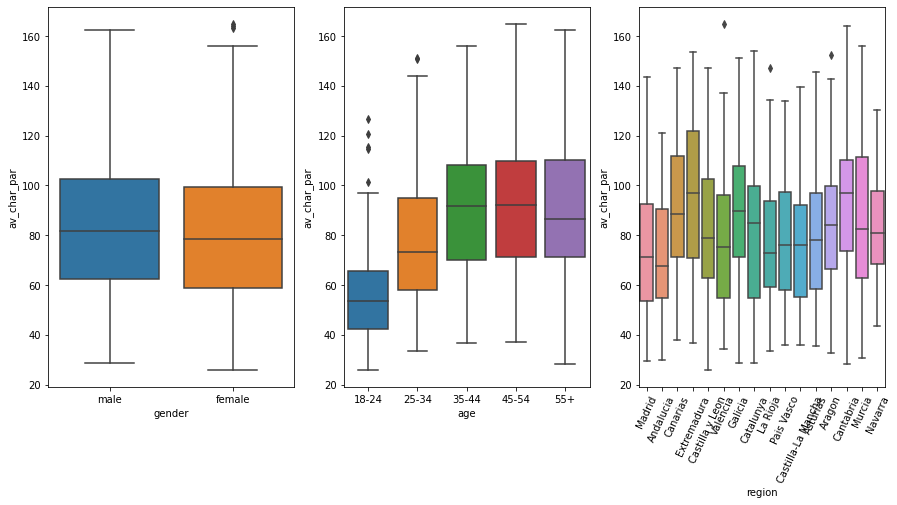

In [14]:
# remove outliers
data = remove_outliers(data,column='av_char_par',value=165)
# boxplot
box_plot('av_char_par',data)
# statistics
statistics('av_char_par',data)

#### Conclusions
- The variables *gender* and *average count of characters per paragraph* are ***INDEPENDENT***: the statistical measure, d of Cohen, is below 0.2 therefore we consider them independent. We can also see in the plots are very similar.
- The variables *age* and *average count of characters per paragraph* are ***DEPENDENT***: the f of Cohen isn't close to 0, and in the plots we can observe how the eldest users (>35 years) write more characters per paragraph than the youngest users (specially 18-24 years). 
- The variables *demography* and *average count of characters per paragraph* have ***MODERATE DEPENDENCY***: the f of Cohen isn't close to 0 but as smaller than the latter. We can appreciate in the plot that users from regions like *Extremadura, Cantabria or Canarias* write more characters per paragraph than users from *Andalucia or Madrid*

### 5. Variation in tweets length

In [28]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'variation')
print(res)

MannwhitneyuResult(statistic=171196.0, pvalue=0.17933059408457686)


In [29]:
# Kruskal-Wallis test
kruskal_posthoc(df,'variation')


AGE: KruskalResult(statistic=142.26993729194646, pvalue=9.217677175528855e-30)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.539147e-05  1.009433e-15  2.075964e-23  8.623132e-22
25-34  1.539147e-05  1.000000e+00  7.901922e-04  1.560884e-07  6.869955e-07
35-44  1.009433e-15  7.901922e-04  1.000000e+00  2.306471e-01  2.316488e-01
45-54  2.075964e-23  1.560884e-07  2.306471e-01  1.000000e+00  8.764362e-01
55+    8.623132e-22  6.869955e-07  2.316488e-01  8.764362e-01  1.000000e+00
REGION: KruskalResult(statistic=23.560000351185863, pvalue=0.07295217080651276)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000        1.0          1.0       1.0   
Andalucia           1.000000        1.0          1.0       1.0   
Extremadura         1.000000        1.0          1.0       1.0   
Canarias            1.000000        1.0          1.0       1.0   
Castilla y Leon     1.000000        1.0   

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.07103059425883126
The f of Cohen for age is: 59.21493691556739
The f of Cohen normalized for age is: 0.408469967048314
The f of Cohen for demography is: 129.92670265461368
The f of Cohen normalized for demography is: 0.281407195216239


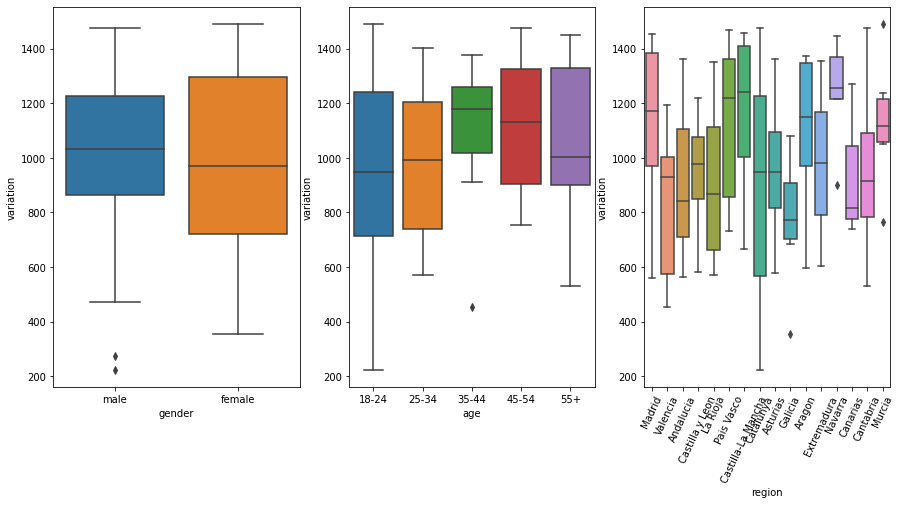

In [15]:
# remove outliers
data = remove_outliers(data,column='variation',value=1500)
# boxplot
box_plot('variation',data)
# statistics
statistics('variation',data)

## SYNTACTIC BASED FEATURES ANALYSIS: 

1. Number of determiners
2. Number of prepositions
3. Number of singular nouns
4. Number of plurar nouns
5. Number of adverbs
6. Number of adjetives
7. Number of proper nouns
8. Number of pronouns
9. Number of past tense verbs
10. Number of future tense verbs
11. Number of conjunctions

#### Steps:

- Create boxplots to visualize independence between studied features and the users personal traits (gender, age and demography)
- Statistical measures: d of Cohen for traits with only 2 options, f of Cohen for traits with more than 2 possibilities.
The d of Cohen can be either positive or negative. Two variables are considered independant when the absolute value of d is 0 or very close to 0, and as the absolute value of d gets bigger, the relationship between the variables becomes stronger. Normaly, when the value is below 0.2 the dependency between the variables is considered small, when it is around 0.5 it's considered moderate, and the dependency is big when the value is greater than 0.8. These measures apply as well for the f of Cohen normilized. This measure is calculated dividing the f of Cohen between the difference of the max and min values of the groups of each of the studied features.

In [30]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        ("ü","u"),
        ("ñ","n"),
        ("ç","c"),
        ("\u2026","..."),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [31]:
# remove accents as tweets have them removed
# PoS Tag
def tagger():
    oraciones = cess_esp.tagged_sents()
    oraciones_sin_acentos = []
    for oracion in oraciones:
        oracion_sin_acento = []
        for palabra,tag in oracion:
            palabra = normalize(palabra)
            oracion_sin_acento.append((palabra,tag))
        oraciones_sin_acentos.append(oracion_sin_acento)

    return nltk.UnigramTagger(oraciones_sin_acentos)

In [32]:
# load data for character based features analysis
def df_syntactic_based():

    data = pd.read_excel('../cleaned_users.xlsx')
    username_list = data['username']

    pos_tag = tagger()

    num_det = []
    num_pre = []
    num_sing = []
    num_plural = []
    num_adv = []
    num_adj = []
    num_prop = []
    num_pronouns = []
    num_past = []
    num_future = []
    num_conj = []

    for username in username_list:
        with open(f'../Cleaned Documents/{username}.txt','r') as f:
            text = f.read()
            # lowercase and remove punctuation marks
            text = text.lower()
            text = text.translate(str.maketrans('','',string.punctuation))
            analysis = pos_tag.tag(text.split(' '))

            det = 0
            pre = 0
            sing = 0
            plural = 0
            adv = 0
            adj = 0
            prop = 0
            pronouns = 0
            past = 0
            future = 0
            conj = 0

            for word,tag in analysis:
                if tag != None:
                    if tag[0] == 'd':
                        det += 1
                    elif tag[0] == 'a':
                        adj += 1
                    elif tag[0] == 'c':
                        conj += 1
                    elif tag[0] == 'p':
                        pronouns += 1
                    elif tag[0] == 'n':
                        if tag[1] == 'p':
                            prop += 1
                        if tag[3] == 's':
                            sing += 1
                        elif tag[3] == 'p':
                            plural += 1
                    elif tag[0] == 'r':
                        adv += 1
                    elif (tag[0] == 'v' and tag[3] == 'f'):
                        future += 1
                    elif (tag[0] == 'v' and tag[3] == 's'):
                        past += 1
                    elif tag[0] == 's':
                        pre += 1

            
            num_det.append(det)
            num_pre.append(pre)
            num_sing.append(sing)
            num_plural.append(plural)
            num_adv.append(adv)
            num_adj.append(adj)
            num_prop.append(prop)
            num_pronouns.append(pronouns)
            num_past.append(past)
            num_future.append(future)
            num_conj.append(conj)

    data['num_det'] = num_det
    data['num_pre'] = num_pre
    data['num_sing'] = num_sing
    data['num_plural'] = num_plural
    data['num_adv'] = num_adv
    data['num_adj'] = num_adj
    data['num_prop'] = num_prop
    data['num_pronouns'] = num_pronouns
    data['num_past'] = num_past
    data['num_future'] = num_future
    data['num_conj'] = num_conj

    return data

In [56]:
# load data for character based features analysis
def df_syntactic_based_ratios():

    data = pd.read_excel('../cleaned_users.xlsx')
    username_list = data['username']

    pos_tag = tagger()

    num_det = []
    num_pre = []
    num_sing = []
    num_plural = []
    num_adv = []
    num_adj = []
    num_prop = []
    num_pronouns = []
    num_past = []
    num_future = []
    num_conj = []

    for username in username_list:
        with open(f'../Cleaned Documents/{username}.txt','r') as f:
            text = f.read()
            # lowercase and remove punctuation marks
            text = text.lower()
            text = text.translate(str.maketrans('','',string.punctuation))
            analysis = pos_tag.tag(text.split(' '))

            num_words = len(analysis)

            det = 0
            pre = 0
            sing = 0
            plural = 0
            adv = 0
            adj = 0
            prop = 0
            pronouns = 0
            past = 0
            future = 0
            conj = 0

            for word,tag in analysis:
                if tag != None:
                    if tag[0] == 'd':
                        det += 1
                    elif tag[0] == 'a':
                        adj += 1
                    elif tag[0] == 'c':
                        conj += 1
                    elif tag[0] == 'p':
                        pronouns += 1
                    elif tag[0] == 'n':
                        if tag[1] == 'p':
                            prop += 1
                        if tag[3] == 's':
                            sing += 1
                        elif tag[3] == 'p':
                            plural += 1
                    elif tag[0] == 'r':
                        adv += 1
                    elif (tag[0] == 'v' and tag[3] == 'f'):
                        future += 1
                    elif (tag[0] == 'v' and tag[3] == 's'):
                        past += 1
                    elif tag[0] == 's':
                        pre += 1

            
            num_det.append(det/num_words)
            num_pre.append(pre/num_words)
            num_sing.append(sing/num_words)
            num_plural.append(plural/num_words)
            num_adv.append(adv/num_words)
            num_adj.append(adj/num_words)
            num_prop.append(prop/num_words)
            num_pronouns.append(pronouns/num_words)
            num_past.append(past/num_words)
            num_future.append(future/num_words)
            num_conj.append(conj/num_words)

    data['ratio_det'] = num_det
    data['ratio_pre'] = num_pre
    data['ratio_sing'] = num_sing
    data['ratio_plural'] = num_plural
    data['ratio_adv'] = num_adv
    data['ratio_adj'] = num_adj
    data['ratio_prop'] = num_prop
    data['ratio_pronouns'] = num_pronouns
    data['ratio_past'] = num_past
    data['ratio_future'] = num_future
    data['ratio_conj'] = num_conj

    return data

In [33]:
data = df_syntactic_based()

In [20]:
data.head()

,username,gender,age,region,num_det,num_pre,num_sing,num_plural,num_adv,num_adj,num_prop,num_pronouns,num_past,num_future,num_conj
0,lozanogarcia68,female,55+,Madrid,107,110,107,30,53,50,0,58,3,2,31
1,beltrangmodet,male,18-24,Madrid,9,16,2,2,6,2,0,11,0,0,3
2,edubellver,male,18-24,Madrid,17,18,12,4,2,5,0,10,0,0,4
3,luss_27,female,18-24,Madrid,145,106,99,29,79,34,0,118,3,2,48
4,k15ce,male,25-34,Madrid,173,130,133,30,61,46,0,90,12,1,54


### 1. Number of determiners

In [34]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_det')
print(res)

MannwhitneyuResult(statistic=132993.0, pvalue=4.099184495958641e-08)


In [35]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_det')


AGE: KruskalResult(statistic=290.6207953322104, pvalue=1.142276707746253e-61)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.142205e-15  4.096125e-33  8.466665e-43  1.977366e-52
25-34  1.142205e-15  1.000000e+00  2.579849e-04  1.553219e-07  1.508503e-12
35-44  4.096125e-33  2.579849e-04  1.000000e+00  1.544598e-01  2.559923e-03
45-54  8.466665e-43  1.553219e-07  1.544598e-01  1.000000e+00  8.751085e-02
55+    1.977366e-52  1.508503e-12  2.559923e-03  8.751085e-02  1.000000e+00
REGION: KruskalResult(statistic=63.92635814427528, pvalue=5.265405186804038e-08)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.088090     1.000000  0.085009   
Andalucia           0.088090   1.000000     1.000000  1.000000   
Extremadura         1.000000   1.000000     1.000000  1.000000   
Canarias            0.085009   1.000000     1.000000  1.000000   
Castilla y Leon     0.000013   1.000000   

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.3159819153101055
The f of Cohen for age is: 62.41093620188187
The f of Cohen normalized for age is: 0.3264225921294715
The f of Cohen for demography is: 30.91959256338237
The f of Cohen normalized for demography is: 0.2652459736145282


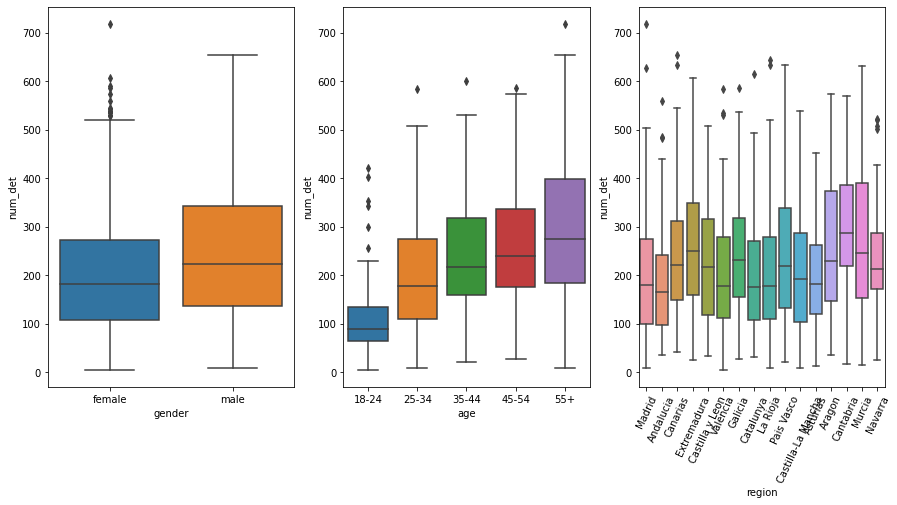

In [21]:
data = df_syntactic_based()
# remove outliers
#data = remove_outliers(data,column='variation',value=1500)
# boxplot
box_plot('num_det',data)
# statistics
statistics('num_det',data)

#### Conclusions
- The variables *gender* and *number of determiners* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 therefore there is statistical evidence to consider a slight dependency. We can also appreciate in the box plot how male users tend to use more determiners than females. 
- The variables *age* and *number of determiners* have ***MODERATE DEPENDENT***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users (specially +55) use more determiners than the youngest users (specially 18-24 years). 
- The variables *demography* and *number of determiners* have ***MODERATE DEPENDENCY***: the f of Cohen is above 0.2 but as smaller than the latter. We can appreciate in the plot that users from regions like *Extremadura, Cantabria or Galicia* use more determiners than users from *Andalucia, Catalunya or Madrid*

### 2. Number of prepositions

In [36]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_pre')
print(res)

MannwhitneyuResult(statistic=131164.0, pvalue=6.118470810792567e-09)


In [37]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_pre')


AGE: KruskalResult(statistic=335.70567452335587, pvalue=2.137703006317095e-71)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  8.283934e-16  2.833537e-36  2.612945e-50  1.154966e-58
25-34  8.283934e-16  1.000000e+00  2.022759e-05  7.863083e-11  1.204423e-15
35-44  2.833537e-36  2.022759e-05  1.000000e+00  8.031289e-02  7.225810e-04
45-54  2.612945e-50  7.863083e-11  8.031289e-02  1.000000e+00  8.328269e-02
55+    1.154966e-58  1.204423e-15  7.225810e-04  8.328269e-02  1.000000e+00
REGION: KruskalResult(statistic=72.5329496991145, pvalue=1.574543086483637e-09)
REGION:                           Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000e+00   0.009752     1.000000  0.130899   
Andalucia           9.751747e-03   1.000000     0.341254  1.000000   
Extremadura         1.000000e+00   0.341254     1.000000  1.000000   
Canarias            1.308990e-01   1.000000     1.000000  1.000000   
Castilla y Leon     6.

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.34395427669576323
The f of Cohen for age is: 68.3351553279546
The f of Cohen normalized for age is: 0.3371628921658962
The f of Cohen for demography is: 29.430180995845834
The f of Cohen normalized for demography is: 0.2663125552017291


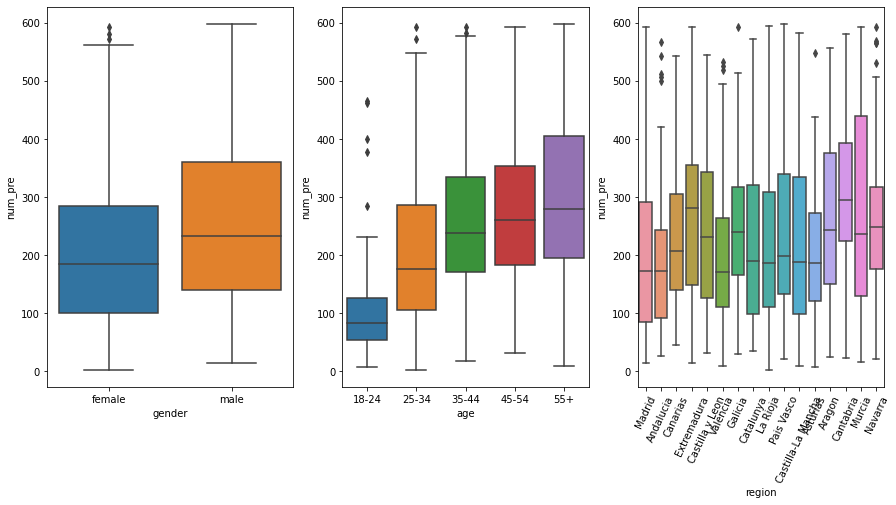

In [22]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_pre',value=600)
# boxplot
box_plot('num_pre',data)
# statistics
statistics('num_pre',data)

#### Conclusions
- The variables *gender* and *number of prepositions* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 therefore there is statistical evidence to consider a slight dependency. We can also appreciate in the box plot how male users tend to use more prepositions than females. 
- The variables *age* and *number of prepositions* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users (>35) use more prepositions than the youngest users (specially 18-24 years). 
- The variables *demography* and *number of determiners* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.2 but as smaller than the latter. We can appreciate in the plot that users from regions like *Extremadura or Cantabria* use more prepositions than users from *Andalucia, Valencia or Madrid*

### 3. Number of singular nouns

In [38]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_sing')
print(res)

MannwhitneyuResult(statistic=135555.5, pvalue=4.945051255875018e-07)


In [57]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_sing')


AGE: KruskalResult(statistic=352.407509810728, pvalue=5.298518734013728e-75)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  6.814247e-16  1.086121e-36  1.399384e-52  1.472218e-61
25-34  6.814247e-16  1.000000e+00  1.426165e-05  6.507541e-12  4.015128e-17
35-44  1.086121e-36  1.426165e-05  1.000000e+00  3.922694e-02  1.754869e-04
45-54  1.399384e-52  6.507541e-12  3.922694e-02  1.000000e+00  7.070715e-02
55+    1.472218e-61  4.015128e-17  1.754869e-04  7.070715e-02  1.000000e+00
REGION: KruskalResult(statistic=71.88290187915405, pvalue=2.059175291433221e-09)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.023484     1.000000  0.066299   
Andalucia           0.023484   1.000000     0.496404  1.000000   
Extremadura         1.000000   0.496404     1.000000  1.000000   
Canarias            0.066299   1.000000     1.000000  1.000000   
Castilla y Leon     0.000001   1.000000    

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.2691103108175933
The f of Cohen for age is: 59.56210993805431
The f of Cohen normalized for age is: 0.33558882766218723
The f of Cohen for demography is: 30.135264538618237
The f of Cohen normalized for demography is: 0.2500021676248515


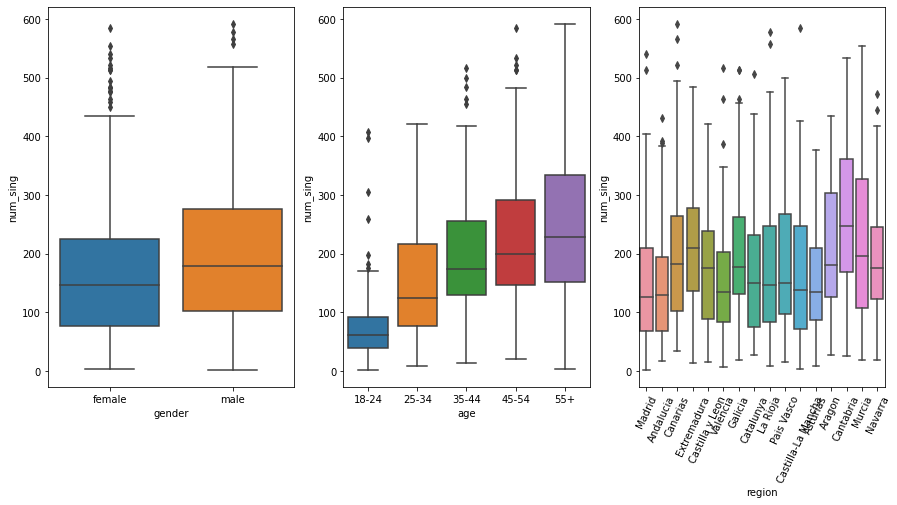

In [23]:
data = df_syntactic_based()
# remove outliers
#data = remove_outliers(data,column='num_pre',value=600)
# boxplot
box_plot('num_sing',data)
# statistics
statistics('num_sing',data)

#### Conclusions
- The variables *gender* and *number of singular nouns* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 therefore there is statistical evidence to consider a slight dependency. We can also appreciate in the box plot how male users tend to use more singular nouns than females. 
- The variables *age* and *number of singular nouns* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users (>35) use more singular nouns than the youngest users (specially 18-24 years). 
- The variables *demography* and *number of singular nouns* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.2 but as smaller than the latter. We can appreciate in the plot that users from regions like *Cantabria* use more singular nouns than users from *Andalucia or Madrid*

### 4. Number of plural nouns

In [40]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_plural')
print(res)

MannwhitneyuResult(statistic=143326.0, pvalue=0.0002732290102951753)


In [41]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_plural')


AGE: KruskalResult(statistic=354.1075164244728, pvalue=2.2755215512857735e-75)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  8.330263e-15  6.324889e-38  4.249872e-53  5.517327e-60
25-34  8.330263e-15  1.000000e+00  8.669882e-07  3.048542e-13  1.740400e-17
35-44  6.324889e-38  8.669882e-07  1.000000e+00  5.913384e-02  1.134081e-03
45-54  4.249872e-53  3.048542e-13  5.913384e-02  1.000000e+00  1.371869e-01
55+    5.517327e-60  1.740400e-17  1.134081e-03  1.371869e-01  1.000000e+00
REGION: KruskalResult(statistic=70.41002694851915, pvalue=3.775228187375055e-09)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.011089     1.000000  0.019687   
Andalucia           0.011089   1.000000     0.086820  1.000000   
Extremadura         1.000000   0.086820     1.000000  0.181508   
Canarias            0.019687   1.000000     0.181508  1.000000   
Castilla y Leon     0.000005   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.19017604892537548
The f of Cohen for age is: 15.32186631119472
The f of Cohen normalized for age is: 0.3634351460772824
The f of Cohen for demography is: 7.306539686489516
The f of Cohen normalized for demography is: 0.24476724482228332


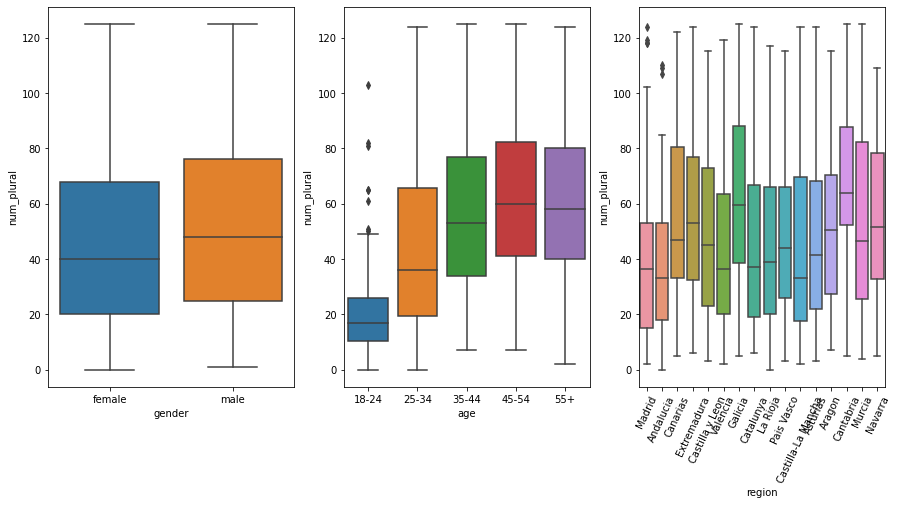

In [24]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_plural',value=125)
# boxplot
box_plot('num_plural',data)
# statistics
statistics('num_plural',data)

#### Conclusions
- The variables *gender* and *number of plural nouns* have ***LOW DEPENDENCY***: the statistical measure, d of Cohen, is below 0.2 therefore there is not enough statistical evidence to consider the variables dependant. We can also appreciate in the box plot how both are very similar. 
- The variables *age* and *number of plural nouns* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users (>35) use more plural nouns than the youngest users (specially 18-24 years). 
- The variables *demography* and *number of plural nouns* have ***LOW DEPENDENCY***: the f of Cohen normalized is above 0.2 but is smaller than the latter. We can appreciate in the plot that users from regions like *Cantabria or Galicia* use more plural nouns than users from *Andalucia or Valencia*

### 5. Number of adverbs

In [42]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_adv')
print(res)

MannwhitneyuResult(statistic=133258.5, pvalue=5.3507523317617326e-08)


In [43]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_adv')


AGE: KruskalResult(statistic=121.88628080513519, pvalue=2.1121445299897406e-25)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.973382e-12  1.362379e-20  4.416912e-19  2.928759e-19
25-34  1.973382e-12  1.000000e+00  1.429784e-01  4.218613e-01  3.143182e-01
35-44  1.362379e-20  1.429784e-01  1.000000e+00  1.000000e+00  1.000000e+00
45-54  4.416912e-19  4.218613e-01  1.000000e+00  1.000000e+00  1.000000e+00
55+    2.928759e-19  3.143182e-01  1.000000e+00  1.000000e+00  1.000000e+00
REGION: KruskalResult(statistic=33.733102338646866, pvalue=0.0037116198542414334)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0          1.0   1.00000         1.000000   
Andalucia              1.0        1.0          1.0   1.00000         1.000000   
Extremadura            1.0        1.0          1.0   1.00000         1.000000   
Canarias               1.0        1.0        

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.24964734555838933
The f of Cohen for age is: 10.613369597405327
The f of Cohen normalized for age is: 0.35654285069304387
The f of Cohen for demography is: 6.098767645665335
The f of Cohen normalized for demography is: 0.30251823639212977


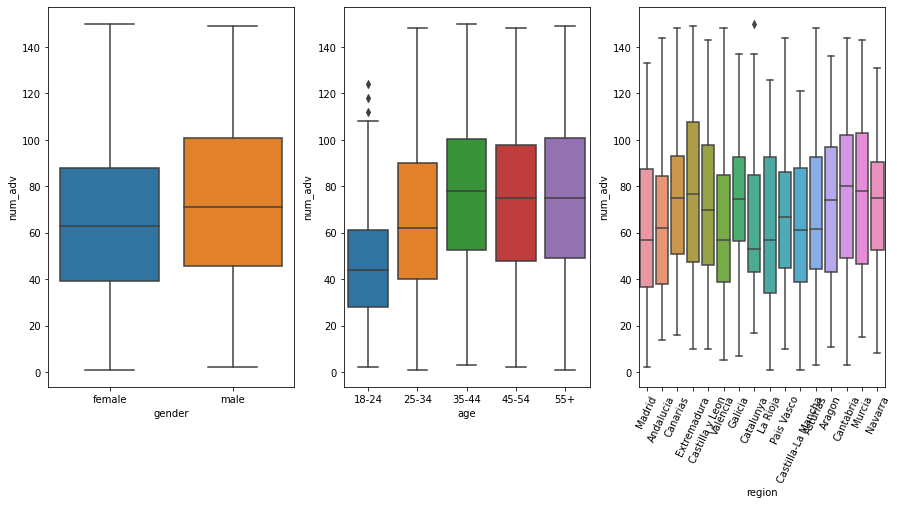

In [25]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_adv',value=150)
# boxplot
box_plot('num_adv',data)
# statistics
statistics('num_adv',data)

#### Conclusions
- The variables *gender* and *number of adverbs* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is slightly above 0.2. We can also appreciate in the box plot how both are very similar. 
- The variables *age* and *number of adverbs* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users (>35) use more adverbs than the youngest users (specially 18-24 years). 
- The variables *demography* and *number of adverbs* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.3 but as smaller than the latter. We can appreciate in the plot that users from regions like *Cantabria or Extremadura* use more adverbs than users from *Catalunya or La Rioja*

### 6. Number of adjetives

In [44]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_adj')
print(res)

MannwhitneyuResult(statistic=131780.5, pvalue=1.1742859056284093e-08)


In [45]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_adj')


AGE: KruskalResult(statistic=326.0355499647884, pvalue=2.613188805599244e-69)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  3.983784e-16  2.152094e-36  7.083188e-48  5.704763e-58
25-34  3.983784e-16  1.000000e+00  2.806480e-05  2.011508e-09  6.000681e-15
35-44  2.152094e-36  2.806480e-05  1.000000e+00  1.030451e-01  1.177223e-03
45-54  7.083188e-48  2.011508e-09  1.030451e-01  1.000000e+00  8.551334e-02
55+    5.704763e-58  6.000681e-15  1.177223e-03  8.551334e-02  1.000000e+00
REGION: KruskalResult(statistic=73.70687752759432, pvalue=9.68638984620514e-10)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.017479     1.000000  0.013880   
Andalucia           0.017479   1.000000     0.279691  1.000000   
Extremadura         1.000000   0.279691     1.000000  0.309207   
Canarias            0.013880   1.000000     0.309207  1.000000   
Castilla y Leon     0.000002   1.000000    

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.32142406326693923
The f of Cohen for age is: 22.02785908340592
The f of Cohen normalized for age is: 0.3317715852862407
The f of Cohen for demography is: 11.24110616613838
The f of Cohen normalized for demography is: 0.2615654238170045


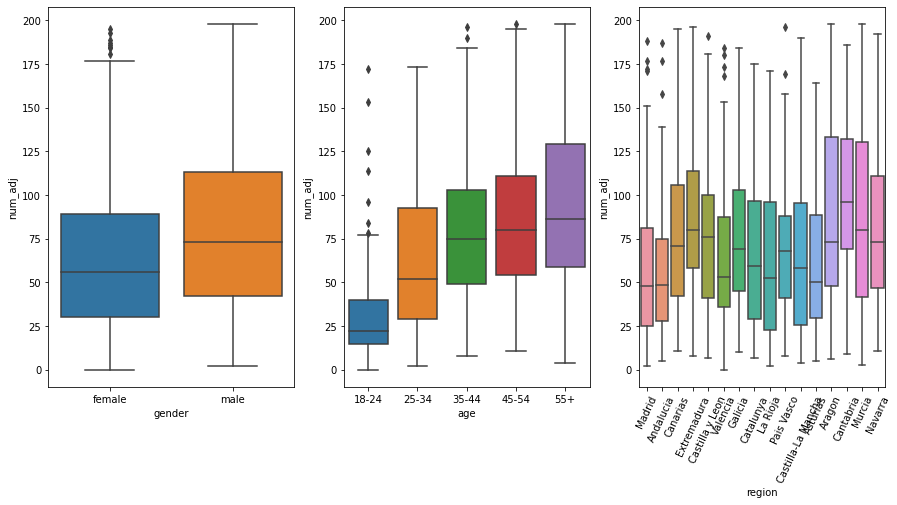

In [26]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_adj',value=200)
# boxplot
box_plot('num_adj',data)
# statistics
statistics('num_adj',data)

#### Conclusions
- The variables *gender* and *number of adjetives* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5, therefore there is statistical evidence to consider the variables slighlty dependant. We can also appreciate in the box plot how male users write more adjetives. 
- The variables *age* and *number of adjetives* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users (>35) use more adjetives than the youngest users (specially 18-24 years). 
- The variables *demography* and *number of adverbs* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.2 but is smaller than the latter. We can appreciate in the plot that users from regions like *Cantabria* use more adjetives than users from *Andalucia or Madrid*

### 7. Number of proper nouns

In [46]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_prop')
print(res)

MannwhitneyuResult(statistic=165369.5, pvalue=0.3053967653950759)


In [47]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_prop')


AGE: KruskalResult(statistic=5.776489181392957, pvalue=0.2164735744521019)
AGE:        18-24     25-34     35-44    45-54  55+
18-24    1.0  1.000000  1.000000  1.00000  1.0
25-34    1.0  1.000000  0.343759  0.59828  1.0
35-44    1.0  0.343759  1.000000  1.00000  1.0
45-54    1.0  0.598280  1.000000  1.00000  1.0
55+      1.0  1.000000  1.000000  1.00000  1.0
REGION: KruskalResult(statistic=24.520404948676873, pvalue=0.056766821542164024)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000        1.0     1.000000       1.0   
Andalucia           1.000000        1.0     1.000000       1.0   
Extremadura         1.000000        1.0     1.000000       1.0   
Canarias            1.000000        1.0     1.000000       1.0   
Castilla y Leon     1.000000        1.0     1.000000       1.0   
Valencia            1.000000        1.0     1.000000       1.0   
Galicia             1.000000        1.0     1.000000       1.0   
Catalunya           0

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.08413359959637097
The f of Cohen for age is: 0.03840813870459735
The f of Cohen normalized for age is: 0.3900894949922378
The f of Cohen for demography is: 0.08454975745371218
The f of Cohen normalized for demography is: 0.25646759760959364


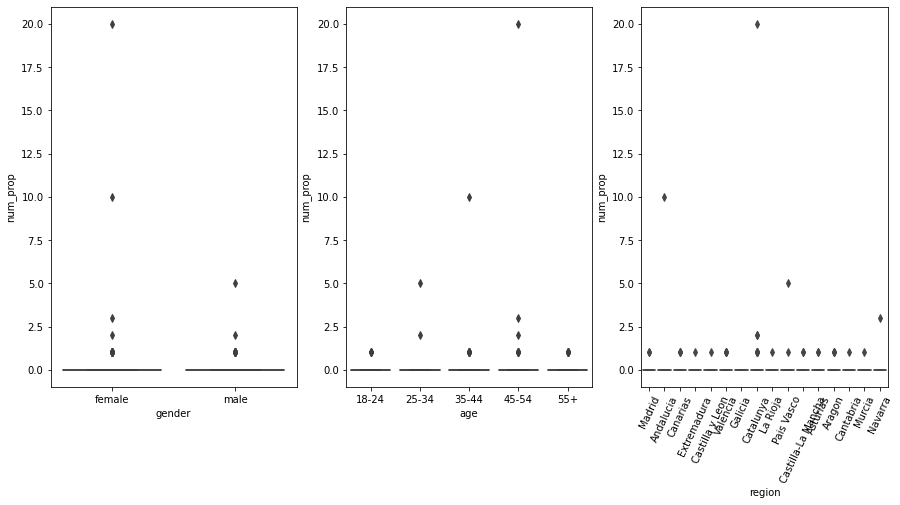

In [27]:
data = df_syntactic_based()
# remove outliers
#data = remove_outliers(data,column='num_adj',value=200)
# boxplot
box_plot('num_prop',data)
# statistics
statistics('num_prop',data)

#### Conclusions
Not enough data to obtain a reliable conclusion. Too many outliers

### 8. Number of pronouns

In [48]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_pronouns')
print(res)

MannwhitneyuResult(statistic=143618.0, pvalue=0.0003343002444733604)


In [49]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_pronouns')


AGE: KruskalResult(statistic=73.34926666596503, pvalue=4.45100571504424e-15)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  2.491135e-09  5.775069e-14  2.417900e-10  1.233020e-10
25-34  2.491135e-09  1.000000e+00  7.501364e-01  1.000000e+00  1.000000e+00
35-44  5.775069e-14  7.501364e-01  1.000000e+00  7.501364e-01  9.769699e-01
45-54  2.417900e-10  1.000000e+00  7.501364e-01  1.000000e+00  1.000000e+00
55+    1.233020e-10  1.000000e+00  9.769699e-01  1.000000e+00  1.000000e+00
REGION: KruskalResult(statistic=21.094169956372756, pvalue=0.13384744543938357)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0          1.0  1.000000         1.000000   
Andalucia              1.0        1.0          1.0  1.000000         1.000000   
Extremadura            1.0        1.0          1.0  1.000000         1.000000   
Canarias               1.0        1.0          1.0

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.20789725686804042
The f of Cohen for age is: 12.253936975528106
The f of Cohen normalized for age is: 0.330152783921283
The f of Cohen for demography is: 7.011721838803267
The f of Cohen normalized for demography is: 0.2614152344277477


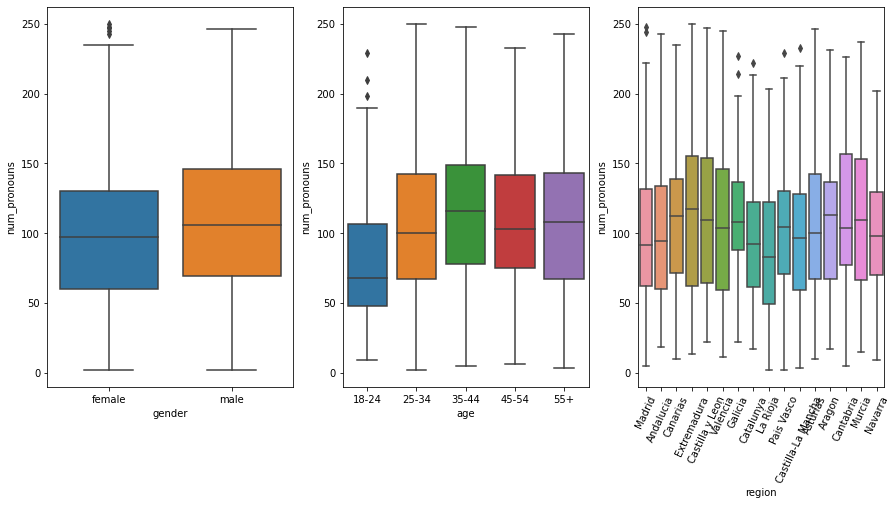

In [28]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_pronouns',value=250)
# boxplot
box_plot('num_pronouns',data)
# statistics
statistics('num_pronouns',data)

#### Conclusions
- The variables *gender* and *number of pronouns* have ***LOW DEPENDENCY***: the statistical measure, d of Cohen, is close to 0.2, therefore there is not enough statistical evidence to consider the variables dependant. We can also appreciate that the box plots are very similar. 
- The variables *age* and *number of pronouns* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.3, and in the plots we can observe how the eldest users use more pronouns than the youngest users (18-24 years). 
- The variables *demography* and *number of pronouns* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.2 and we can appreciate in the plot that users from *Extremadura* use more pronouns that users from *La Rioja*

### 9. Number of past tense verbs

In [50]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_past')
print(res)

MannwhitneyuResult(statistic=139684.5, pvalue=1.737088331866195e-05)


In [51]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_past')


AGE: KruskalResult(statistic=116.24654748563621, pvalue=3.38174936321275e-24)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  4.782861e-09  6.037502e-18  4.229051e-18  1.267460e-19
25-34  4.782861e-09  1.000000e+00  2.997065e-02  3.609969e-02  9.095234e-03
35-44  6.037502e-18  2.997065e-02  1.000000e+00  1.000000e+00  1.000000e+00
45-54  4.229051e-18  3.609969e-02  1.000000e+00  1.000000e+00  1.000000e+00
55+    1.267460e-19  9.095234e-03  1.000000e+00  1.000000e+00  1.000000e+00
REGION: KruskalResult(statistic=60.284276188641314, pvalue=2.2535086246618096e-07)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000        1.0     0.081933  0.135921   
Andalucia           1.000000        1.0     1.000000  1.000000   
Extremadura         0.081933        1.0     1.000000  1.000000   
Canarias            0.135921        1.0     1.000000  1.000000   
Castilla y Leon     1.000000        1.0 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.20664875730590837
The f of Cohen for age is: 1.6105149481754288
The f of Cohen normalized for age is: 0.35159314203226627
The f of Cohen for demography is: 1.2574179959877587
The f of Cohen normalized for demography is: 0.3088950894489859


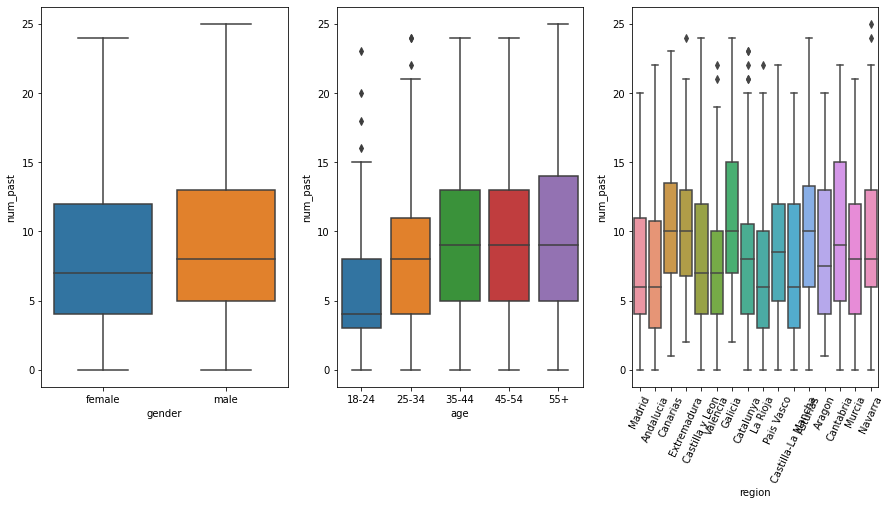

In [29]:
data = df_syntactic_based()
# remove outliers
#data = remove_outliers(data,column='num_past',value=25)
# boxplot
box_plot('num_past',data)
# statistics
statistics('num_past',data)

#### Conclusions
- The variables *gender* and *number of past tense verbas* have ***LOW DEPENDENCY***: the statistical measure, d of Cohen, is close to 0.2, therefore there is not enough statistical evidence to consider the variables dependant. We can also appreciate that male users use more past tense verbs.
- The variables *age* and *number of past tense verbs* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.3 and in the plots we can observe how the eldest users use more past tense verbs. 
- The variables *demography* and *number of past tense verbs* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is close to 0.3 and we can appreciate in the plot that users from *Canarias, Extremadura or Galicia* use more past tense verbs than users from *Madrid, Andalucia or La Rioja*.

### 10. Number of future tense verbs

In [52]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_future')
print(res)

MannwhitneyuResult(statistic=129742.5, pvalue=9.964644213632777e-10)


In [53]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_future')


AGE: KruskalResult(statistic=214.2349105254296, pvalue=3.261189828695048e-45)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  6.965183e-09  9.018089e-22  6.507588e-34  2.177819e-35
25-34  6.965183e-09  1.000000e+00  4.840513e-04  1.793323e-09  1.179491e-10
35-44  9.018089e-22  4.840513e-04  1.000000e+00  3.685481e-02  1.137269e-02
45-54  6.507588e-34  1.793323e-09  3.685481e-02  1.000000e+00  5.347151e-01
55+    2.177819e-35  1.179491e-10  1.137269e-02  5.347151e-01  1.000000e+00
REGION: KruskalResult(statistic=61.143422056184995, pvalue=1.6022229612720111e-07)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.128276     1.000000       1.0   
Andalucia           0.128276   1.000000     0.238899       1.0   
Extremadura         1.000000   0.238899     1.000000       1.0   
Canarias            1.000000   1.000000     1.000000       1.0   
Castilla y Leon     0.010243   1.000000 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.34474305769583485
The f of Cohen for age is: 1.0524847013736156
The f of Cohen normalized for age is: 0.3595277697819449
The f of Cohen for demography is: 0.5990897133690821
The f of Cohen normalized for demography is: 0.30357182993883164


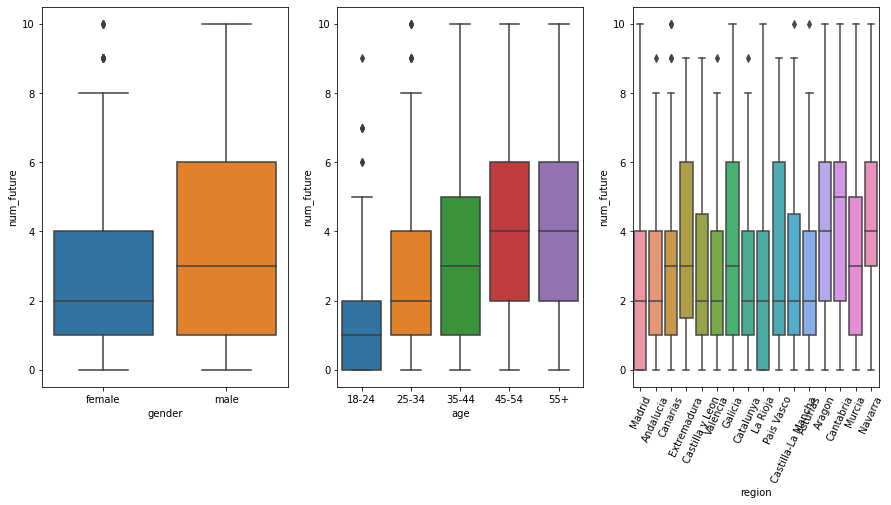

In [30]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_future',value=10)
# boxplot
box_plot('num_future',data)
# statistics
statistics('num_future',data)

#### Conclusions
- The variables *gender* and *number of future tense verbs* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5,therefore we could considere a moderate dependency, and if we observe the plots, we can see how males use more future tense verbs.
- The variables *age* and *number of future tense verbs* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.3 and we can see how the eldest users (>45) use more future tense verbs.
- The variables *demography* and *number of future tense verbs* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is close to 0.3 and we can see how users from *Cantabria* use more future tense verbs than, for instance, users from *Madrid*

### 11. Number of conjunctions

In [54]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_conj')
print(res)

MannwhitneyuResult(statistic=136222.5, pvalue=9.139160340325941e-07)


In [55]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_conj')


AGE: KruskalResult(statistic=211.310992036172, pvalue=1.3879836055663138e-44)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  5.888946e-13  7.516426e-26  3.013509e-31  1.443530e-38
25-34  5.888946e-13  1.000000e+00  3.796690e-03  1.159087e-04  3.458129e-08
35-44  7.516426e-26  3.796690e-03  1.000000e+00  4.085859e-01  3.463668e-02
45-54  3.013509e-31  1.159087e-04  4.085859e-01  1.000000e+00  1.497463e-01
55+    1.443530e-38  3.458129e-08  3.463668e-02  1.497463e-01  1.000000e+00
REGION: KruskalResult(statistic=51.528543692609354, pvalue=6.757325657449457e-06)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.315971     1.000000  0.652643   
Andalucia           0.315971   1.000000     1.000000  1.000000   
Extremadura         1.000000   1.000000     1.000000  1.000000   
Canarias            0.652643   1.000000     1.000000  1.000000   
Castilla y Leon     0.001457   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.27990957098594565
The f of Cohen for age is: 17.478280889286157
The f of Cohen normalized for age is: 0.32816029653166034
The f of Cohen for demography is: 8.976837950330625
The f of Cohen normalized for demography is: 0.30982785700875093


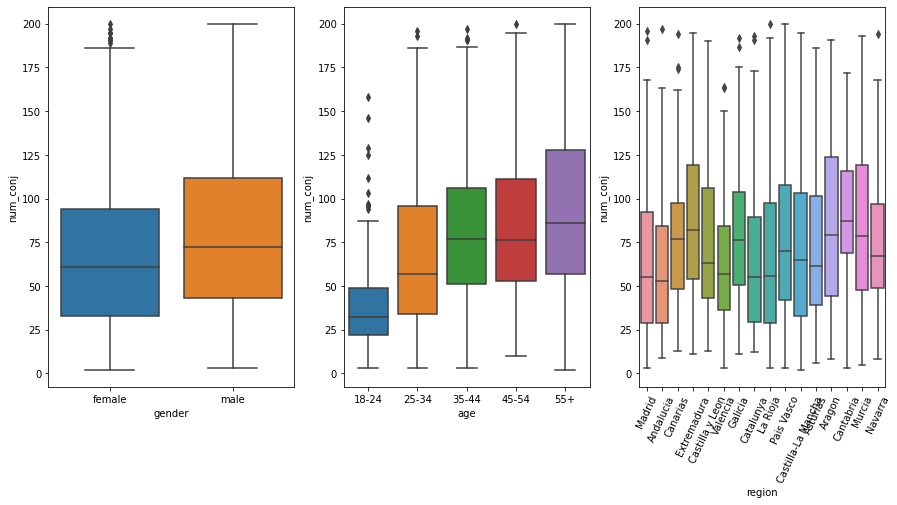

In [31]:
data = df_syntactic_based()
# remove outliers
data = remove_outliers(data,column='num_conj',value=200)
# boxplot
box_plot('num_conj',data)
# statistics
statistics('num_conj',data)

In [58]:
data = df_syntactic_based_ratios()
data.head()

,username,gender,age,region,ratio_det,ratio_pre,ratio_sing,ratio_plural,ratio_adv,ratio_adj,ratio_prop,ratio_pronouns,ratio_past,ratio_future,ratio_conj
0,lozanogarcia68,female,55+,Madrid,0.122970,0.127610,0.120650,0.032483,0.060325,0.058005,0.0,0.066125,0.003480,0.002320,0.035963
1,beltrangmodet,male,18-24,Madrid,0.095745,0.170213,0.021277,0.021277,0.063830,0.021277,0.0,0.117021,0.000000,0.000000,0.031915
2,edubellver,male,18-24,Madrid,0.133858,0.141732,0.094488,0.031496,0.015748,0.039370,0.0,0.078740,0.000000,0.000000,0.031496
3,luss_27,female,18-24,Madrid,0.134884,0.098605,0.092093,0.026977,0.073488,0.031628,0.0,0.109767,0.002791,0.001860,0.044651
4,k15ce,male,25-34,Madrid,0.158570,0.119157,0.121907,0.027498,0.055912,0.042163,0.0,0.082493,0.010999,0.000917,0.049496


### 1. Ratios of determiners

In [60]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_det')
print(res)

MannwhitneyuResult(statistic=137030.0, pvalue=1.8903686411830656e-06)


In [61]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_det')


AGE: KruskalResult(statistic=117.08197620191932, pvalue=2.2427865357541856e-24)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  4.595663e-07  3.070480e-10  6.519899e-15  2.198439e-24
25-34  4.595663e-07  1.000000e+00  3.656343e-01  3.184290e-02  1.649653e-06
35-44  3.070480e-10  3.656343e-01  1.000000e+00  3.656343e-01  3.439424e-04
45-54  6.519899e-15  3.184290e-02  3.656343e-01  1.000000e+00  2.193710e-02
55+    2.198439e-24  1.649653e-06  3.439424e-04  2.193710e-02  1.000000e+00
REGION: KruskalResult(statistic=41.143092767246145, pvalue=0.0003041165451083138)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000        1.0     1.000000  0.034874   
Andalucia           1.000000        1.0     1.000000  1.000000   
Extremadura         1.000000        1.0     1.000000  1.000000   
Canarias            0.034874        1.0     1.000000  1.000000   
Castilla y Leon     0.267614        1.0

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.2403563699706206
The f of Cohen for age is: 0.004871456932103937
The f of Cohen normalized for age is: 0.3157558813454277
The f of Cohen for demography is: 0.00324556725380528
The f of Cohen normalized for demography is: 0.2446854938465926


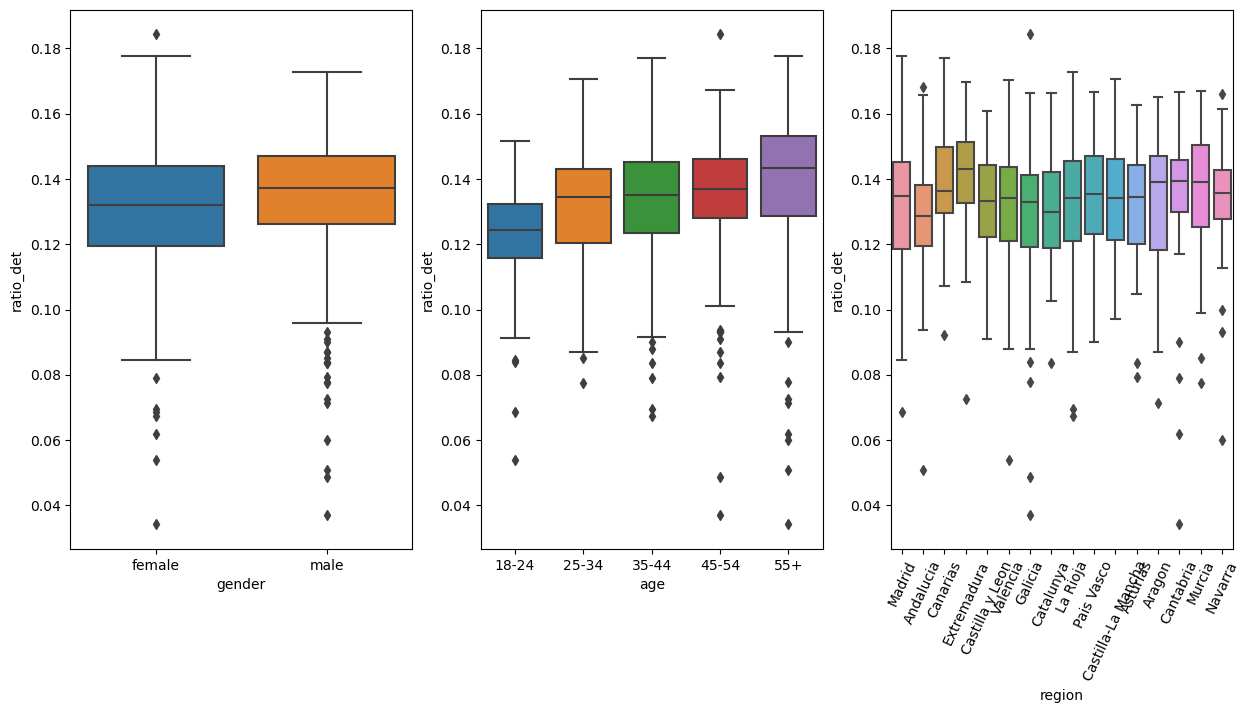

In [62]:
# remove outliers
#data = remove_outliers(data,column='variation',value=1500)
# boxplot
box_plot('ratio_det',data)
# statistics
statistics('ratio_det',data)

### 2. Ratios of prepositions

In [63]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_pre')
print(res)

MannwhitneyuResult(statistic=133431.0, pvalue=6.36642355993019e-08)


In [64]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_pre')


AGE: KruskalResult(statistic=296.0267882238407, pvalue=7.795159327286677e-63)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  2.835012e-11  2.660300e-26  5.142717e-45  2.541538e-50
25-34  2.835012e-11  1.000000e+00  1.789758e-04  8.245058e-13  2.365840e-16
35-44  2.660300e-26  1.789758e-04  1.000000e+00  1.984066e-03  3.522693e-05
45-54  5.142717e-45  8.245058e-13  1.984066e-03  1.000000e+00  2.000832e-01
55+    2.541538e-50  2.365840e-16  3.522693e-05  2.000832e-01  1.000000e+00
REGION: KruskalResult(statistic=71.54034256657648, pvalue=2.3714826655695427e-09)
REGION:                           Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000e+00   0.000261     1.000000  0.055434   
Andalucia           2.612736e-04   1.000000     0.200483  1.000000   
Extremadura         1.000000e+00   0.200483     1.000000  1.000000   
Canarias            5.543437e-02   1.000000     1.000000  1.000000   
Castilla y Leon     6

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.31438919593943393
The f of Cohen for age is: 0.014714297830632484
The f of Cohen normalized for age is: 0.3458576529275979
The f of Cohen for demography is: 0.007768554327661234
The f of Cohen normalized for demography is: 0.2210910705218501


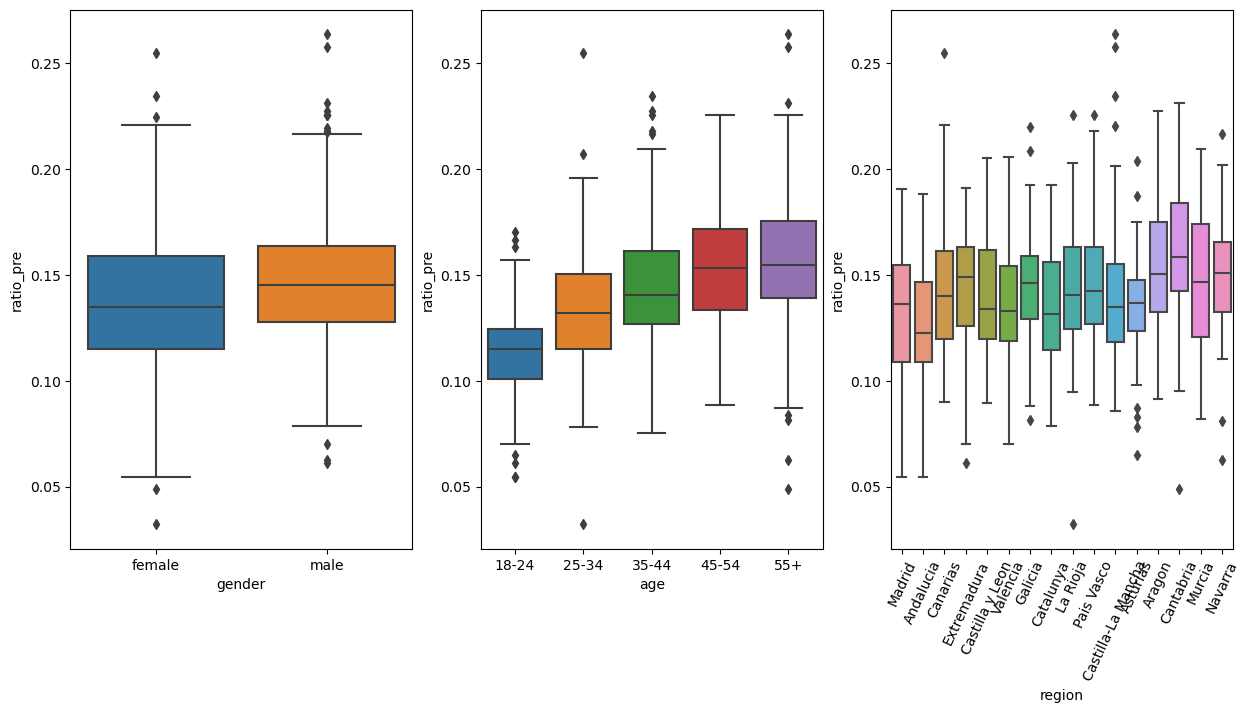

In [65]:
# remove outliers
#data = remove_outliers(data,column='num_pre',value=600)
# boxplot
box_plot('ratio_pre',data)
# statistics
statistics('ratio_pre',data)

### 3. Ratio of singular words

In [66]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_sing')
print(res)

MannwhitneyuResult(statistic=149871.5, pvalue=0.013543459743655853)


In [67]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_sing')


AGE: KruskalResult(statistic=332.1597286234314, pvalue=1.2455337157183516e-70)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  2.797005e-11  5.480323e-28  3.444428e-49  3.119637e-56
25-34  2.797005e-11  1.000000e+00  3.578885e-05  3.712289e-15  6.430853e-20
35-44  5.480323e-28  3.578885e-05  1.000000e+00  6.202764e-04  2.335740e-06
45-54  3.444428e-49  3.712289e-15  6.202764e-04  1.000000e+00  1.245065e-01
55+    3.119637e-56  6.430853e-20  2.335740e-06  1.245065e-01  1.000000e+00
REGION: KruskalResult(statistic=67.06597429941297, pvalue=1.4800766882156826e-08)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.010961     1.000000  0.003294   
Andalucia           0.010961   1.000000     0.940120  1.000000   
Extremadura         1.000000   0.940120     1.000000  0.665002   
Canarias            0.003294   1.000000     0.665002  1.000000   
Castilla y Leon     0.000001   1.000000 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.145291367797387
The f of Cohen for age is: 0.012324739165152221
The f of Cohen normalized for age is: 0.34801247962022
The f of Cohen for demography is: 0.005551261814969332
The f of Cohen normalized for demography is: 0.24140306042445583


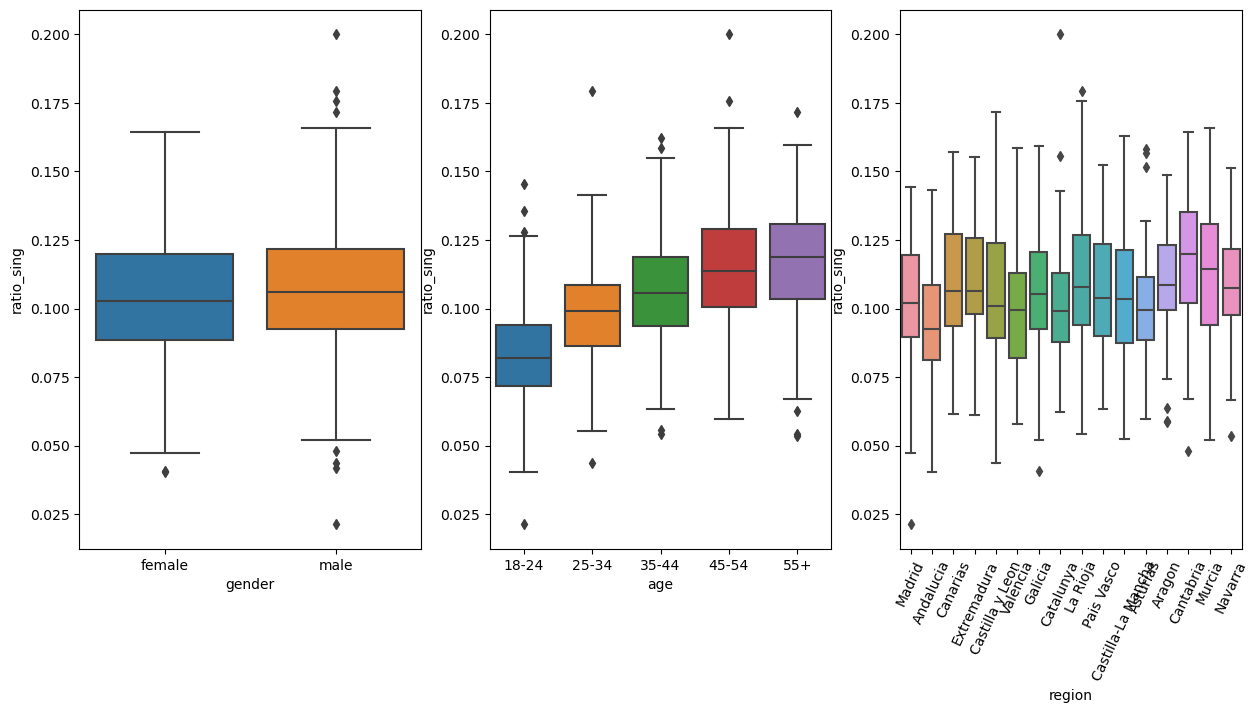

In [68]:
# remove outliers
#data = remove_outliers(data,column='num_pre',value=600)
# boxplot
box_plot('ratio_sing',data)
# statistics
statistics('ratio_sing',data)

### 4. Ratio of plural words

In [69]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_plural')
print(res)

MannwhitneyuResult(statistic=163731.5, pvalue=0.993296159919535)


In [70]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_plural')


AGE: KruskalResult(statistic=282.28989412211905, pvalue=7.149238228207628e-60)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.894395e-08  3.566406e-28  1.001221e-41  8.203501e-45
25-34  1.894395e-08  1.000000e+00  1.779043e-07  1.430406e-14  6.130699e-17
35-44  3.566406e-28  1.779043e-07  1.000000e+00  4.363275e-02  5.495774e-03
45-54  1.001221e-41  1.430406e-14  4.363275e-02  1.000000e+00  3.609329e-01
55+    8.203501e-45  6.130699e-17  5.495774e-03  3.609329e-01  1.000000e+00
REGION: KruskalResult(statistic=57.33605410802035, pvalue=7.196277140520382e-07)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.012716     1.000000  0.003294   
Andalucia           0.012716   1.000000     0.035572  1.000000   
Extremadura         1.000000   0.035572     1.000000  0.012629   
Canarias            0.003294   1.000000     0.012629  1.000000   
Castilla y Leon     0.000450   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.03120044906320805
The f of Cohen for age is: 0.0059179293369482616
The f of Cohen normalized for age is: 0.35535651663883633
The f of Cohen for demography is: 0.0028360219030147235
The f of Cohen normalized for demography is: 0.2690694438237181


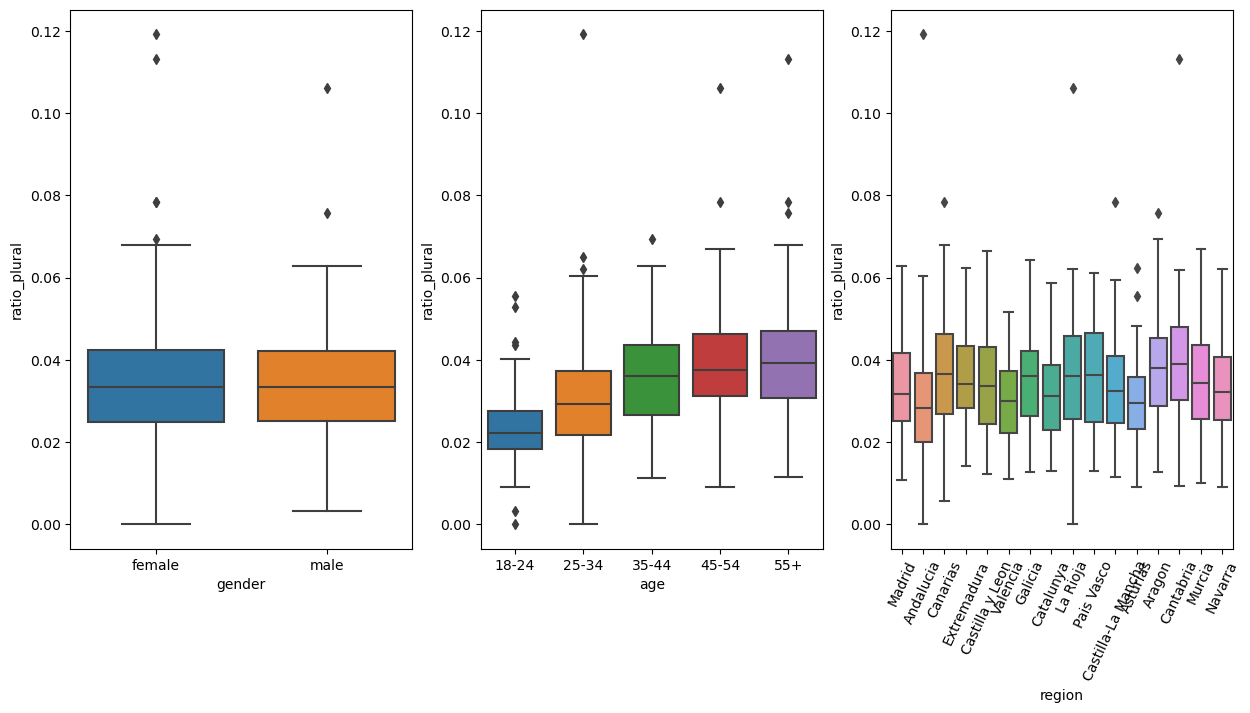

In [71]:
# remove outliers
#data = remove_outliers(data,column='ratio_plural',value=125)
# boxplot
box_plot('ratio_plural',data)
# statistics
statistics('ratio_plural',data)

### 4. Ratio of adverbs

In [72]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_adv')
print(res)

MannwhitneyuResult(statistic=160022.5, pvalue=0.5128082712404542)


In [73]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_adv')


AGE: KruskalResult(statistic=191.2569126388546, pvalue=2.845732993353754e-40)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.823746e-02  1.279479e-11  1.801483e-23  6.770152e-29
25-34  1.823746e-02  1.000000e+00  2.227233e-05  3.022103e-14  6.835332e-19
35-44  1.279479e-11  2.227233e-05  1.000000e+00  5.012379e-03  2.247956e-05
45-54  1.801483e-23  3.022103e-14  5.012379e-03  1.000000e+00  1.257681e-01
55+    6.770152e-29  6.835332e-19  2.247956e-05  1.257681e-01  1.000000e+00
REGION: KruskalResult(statistic=49.85830627118129, pvalue=1.2700169162877657e-05)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.012580     1.000000  1.000000   
Andalucia           0.012580   1.000000     0.000363  1.000000   
Extremadura         1.000000   0.000363     1.000000  0.056725   
Canarias            1.000000   1.000000     0.056725  1.000000   
Castilla y Leon     0.054358   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.04130007769916904
The f of Cohen for age is: 0.006113742838961116
The f of Cohen normalized for age is: 0.3658112421131031
The f of Cohen for demography is: 0.0034223989905469874
The f of Cohen normalized for demography is: 0.24710710405683964


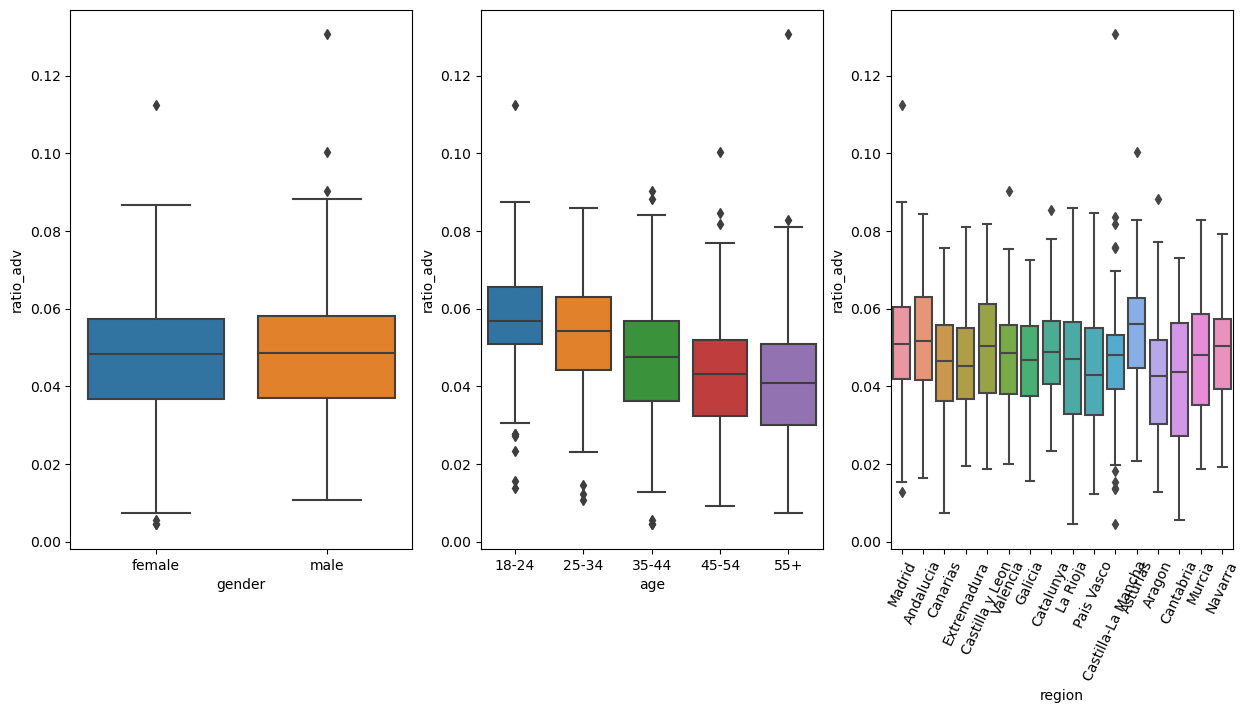

In [74]:
# remove outliers
#data = remove_outliers(data,column='num_adv',value=150)
# boxplot
box_plot('ratio_adv',data)
# statistics
statistics('ratio_adv',data)

### 6. Ratio of adjetives

In [75]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_adj')
print(res)

MannwhitneyuResult(statistic=140682.0, pvalue=3.923447116027155e-05)


In [76]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_adj')


AGE: KruskalResult(statistic=214.79072054959173, pvalue=2.4762719820215552e-45)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.575738e-09  1.939894e-23  1.612974e-29  3.085454e-39
25-34  1.575738e-09  1.000000e+00  2.950184e-04  1.478052e-06  5.514816e-12
35-44  1.939894e-23  2.950184e-04  1.000000e+00  2.970255e-01  3.973956e-03
45-54  1.612974e-29  1.478052e-06  2.970255e-01  1.000000e+00  4.618476e-02
55+    3.085454e-39  5.514816e-12  3.973956e-03  4.618476e-02  1.000000e+00
REGION: KruskalResult(statistic=66.23059947773969, pvalue=2.0773670383578736e-08)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.012661     1.000000  0.000062   
Andalucia           0.012661   1.000000     0.123059  1.000000   
Extremadura         1.000000   0.123059     1.000000  0.002191   
Canarias            0.000062   1.000000     0.002191  1.000000   
Castilla y Leon     0.000070   1.000000

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.25031301336190076
The f of Cohen for age is: 0.005267808344377757
The f of Cohen normalized for age is: 0.3303769547084436
The f of Cohen for demography is: 0.00283777205741444
The f of Cohen normalized for demography is: 0.29201527962247337


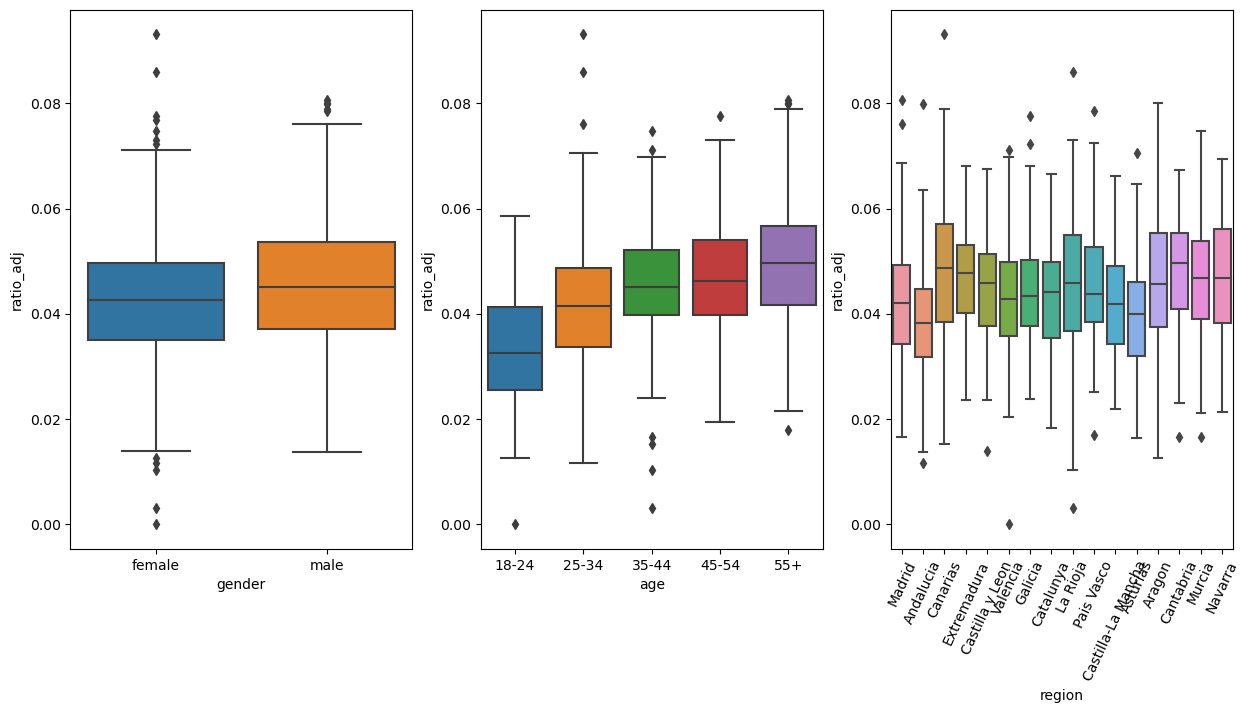

In [77]:
# remove outliers
#data = remove_outliers(data,column='num_adj',value=200)
# boxplot
box_plot('ratio_adj',data)
# statistics
statistics('ratio_adj',data)

### 7. Ratio of propositions

In [78]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_prop')
print(res)

MannwhitneyuResult(statistic=165386.5, pvalue=0.3005838956383431)


In [79]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_prop')


AGE: KruskalResult(statistic=5.712317665441111, pvalue=0.22168734053712327)
AGE:        18-24     25-34     35-44    45-54  55+
18-24    1.0  1.000000  1.000000  1.00000  1.0
25-34    1.0  1.000000  0.342338  0.61033  1.0
35-44    1.0  0.342338  1.000000  1.00000  1.0
45-54    1.0  0.610330  1.000000  1.00000  1.0
55+      1.0  1.000000  1.000000  1.00000  1.0
REGION: KruskalResult(statistic=24.70180079095719, pvalue=0.054094337030154975)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000        1.0     1.000000       1.0   
Andalucia           1.000000        1.0     1.000000       1.0   
Extremadura         1.000000        1.0     1.000000       1.0   
Canarias            1.000000        1.0     1.000000       1.0   
Castilla y Leon     1.000000        1.0     1.000000       1.0   
Valencia            1.000000        1.0     1.000000       1.0   
Galicia             1.000000        1.0     1.000000       1.0   
Catalunya           0

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.07820288611275629
The f of Cohen for age is: 1.6903442032227015e-05
The f of Cohen normalized for age is: 0.3906082958312277
The f of Cohen for demography is: 5.0707738090468655e-05
The f of Cohen normalized for demography is: 0.26436440362853475


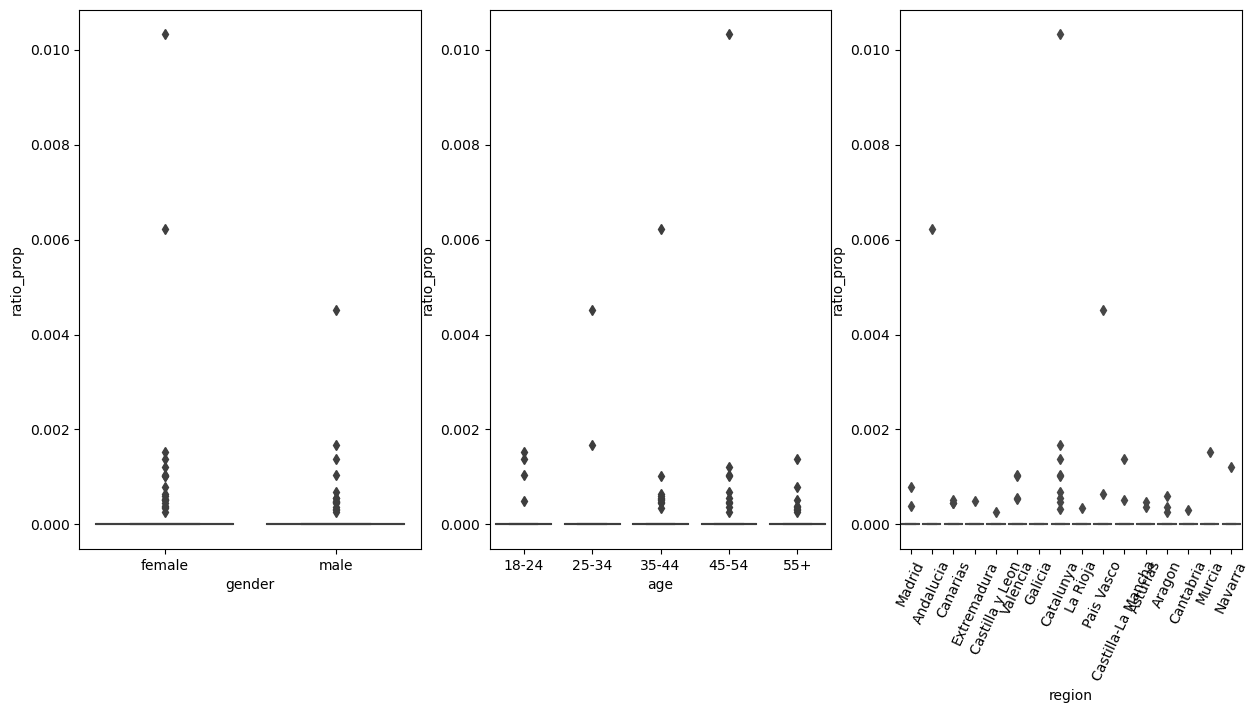

In [80]:
# remove outliers
#data = remove_outliers(data,column='num_adj',value=200)
# boxplot
box_plot('ratio_prop',data)
# statistics
statistics('ratio_prop',data)

### 8. Ratio of pronouns

In [81]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_pronouns')
print(res)

MannwhitneyuResult(statistic=175934.0, pvalue=0.028537016161061385)


In [82]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_pronouns')


AGE: KruskalResult(statistic=294.289409594275, pvalue=1.847365369934464e-62)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  3.399591e-06  5.018341e-21  2.451686e-40  2.477451e-47
25-34  3.399591e-06  1.000000e+00  3.813470e-06  1.485010e-17  8.063127e-23
35-44  5.018341e-21  3.813470e-06  1.000000e+00  3.192893e-04  8.640057e-07
45-54  2.451686e-40  1.485010e-17  3.192893e-04  1.000000e+00  1.087257e-01
55+    2.477451e-47  8.063127e-23  8.640057e-07  1.087257e-01  1.000000e+00
REGION: KruskalResult(statistic=73.46884321117997, pvalue=1.0690528307588633e-09)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.009946     1.000000  0.823687   
Andalucia           0.009946   1.000000     0.025225  1.000000   
Extremadura         1.000000   0.025225     1.000000  1.000000   
Canarias            0.823687   1.000000     1.000000  1.000000   
Castilla y Leon     0.000042   1.000000   

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.15657281139359688
The f of Cohen for age is: 0.013269377228526337
The f of Cohen normalized for age is: 0.3518489338219441
The f of Cohen for demography is: 0.006605083163950921
The f of Cohen normalized for demography is: 0.2659910848010988


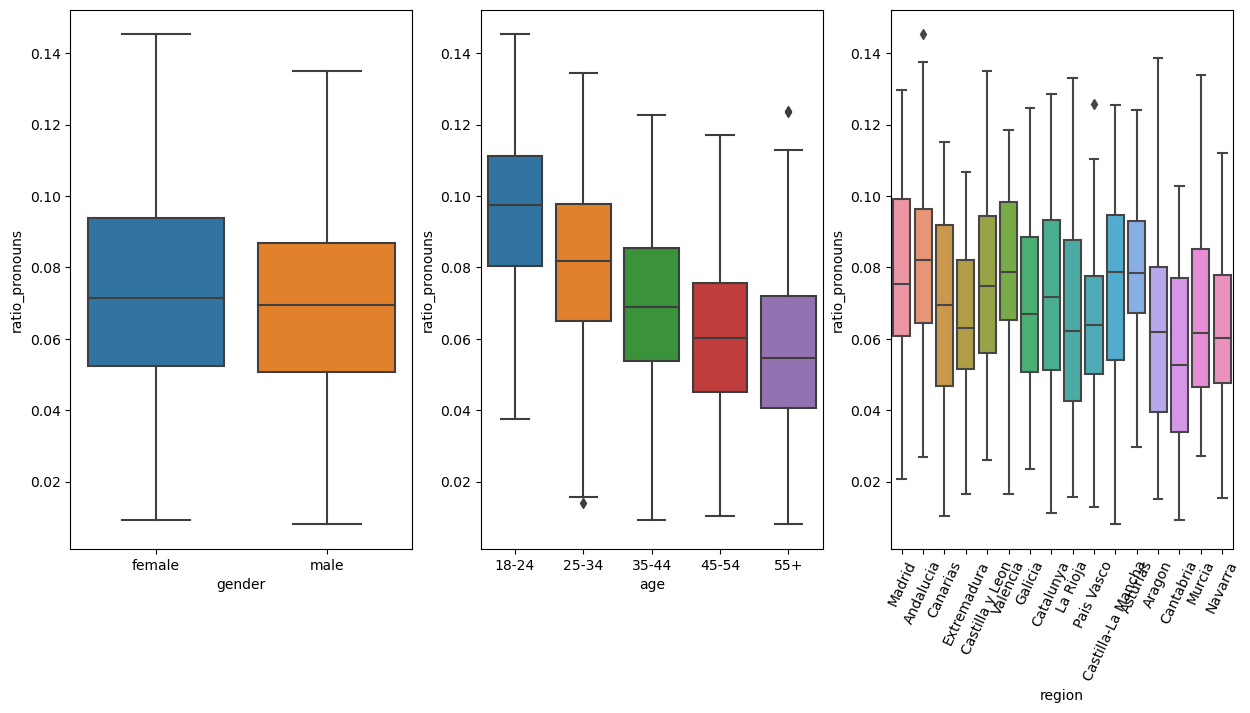

In [83]:
# remove outliers
#data = remove_outliers(data,column='num_pronouns',value=250)
# boxplot
box_plot('ratio_pronouns',data)
# statistics
statistics('ratio_pronouns',data)

### 9. Ratio of past tense verbs

In [84]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_past')
print(res)

MannwhitneyuResult(statistic=154594.5, pvalue=0.10419752295679328)


In [85]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_past')


AGE: KruskalResult(statistic=10.881101911657707, pvalue=0.027933268889464066)
AGE:           18-24     25-34     35-44     45-54       55+
18-24  1.000000  1.000000  1.000000  0.463212  0.296464
25-34  1.000000  1.000000  1.000000  0.296464  0.133956
35-44  1.000000  1.000000  1.000000  0.356762  0.190820
45-54  0.463212  0.296464  0.356762  1.000000  1.000000
55+    0.296464  0.133956  0.190820  1.000000  1.000000
REGION: KruskalResult(statistic=63.35138340801505, pvalue=6.632878089299433e-08)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   1.000000     0.015534  1.000000   
Andalucia           1.000000   1.000000     0.000199  0.998739   
Extremadura         0.015534   0.000199     1.000000  1.000000   
Canarias            1.000000   0.998739     1.000000  1.000000   
Castilla y Leon     1.000000   1.000000     0.000298  1.000000   
Valencia            1.000000   1.000000     0.001542  1.000000   
Galicia             1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.10742909947247464
The f of Cohen for age is: 0.0002899040018718144
The f of Cohen normalized for age is: 0.39616859463645626
The f of Cohen for demography is: 0.0008651486740212729
The f of Cohen normalized for demography is: 0.2561615097019461


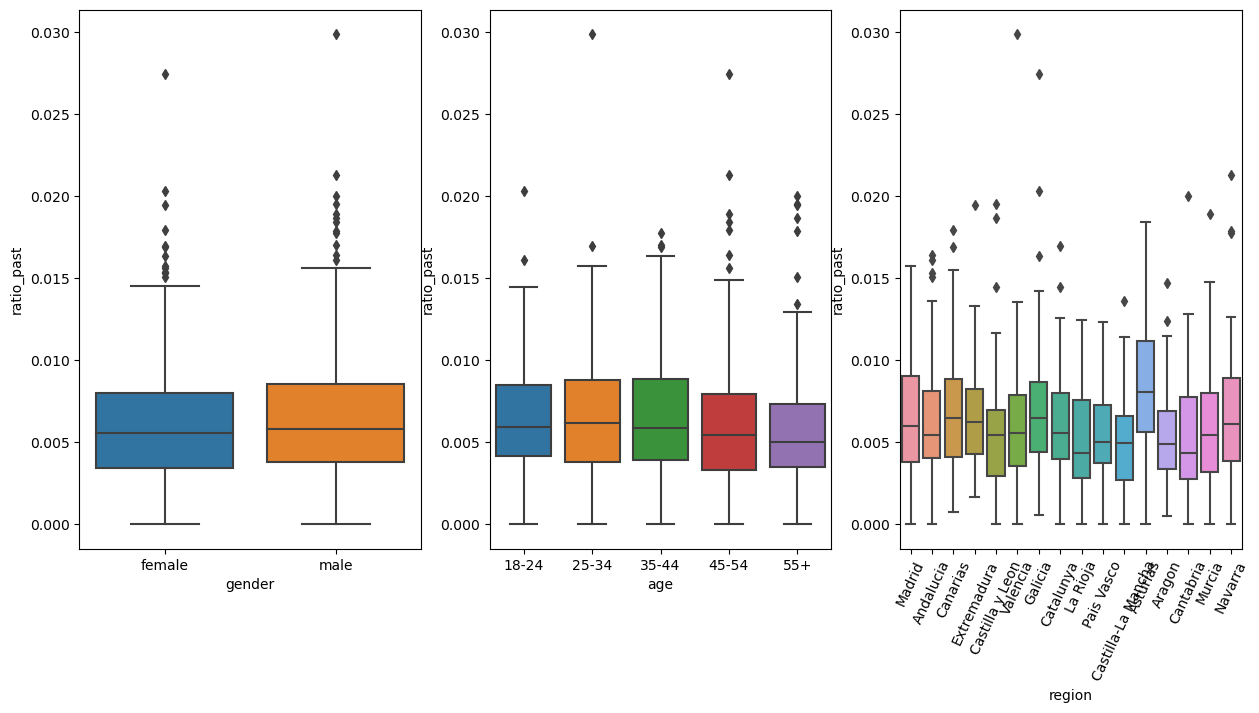

In [86]:
# remove outliers
#data = remove_outliers(data,column='num_past',value=25)
# boxplot
box_plot('ratio_past',data)
# statistics
statistics('ratio_past',data)

### 10. Ratio of future tense verbs

In [87]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_future')
print(res)

MannwhitneyuResult(statistic=137210.0, pvalue=2.116427162119309e-06)


In [88]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_future')


AGE: KruskalResult(statistic=66.87361120776481, pvalue=1.0365796839005237e-13)
AGE:               18-24     25-34         35-44         45-54           55+
18-24  1.000000e+00  0.011785  5.686662e-07  4.094055e-11  9.843573e-11
25-34  1.178520e-02  1.000000  6.224799e-02  5.518030e-04  6.547604e-04
35-44  5.686662e-07  0.062248  1.000000e+00  4.273044e-01  4.273044e-01
45-54  4.094055e-11  0.000552  4.273044e-01  1.000000e+00  9.814763e-01
55+    9.843573e-11  0.000655  4.273044e-01  9.814763e-01  1.000000e+00
REGION: KruskalResult(statistic=43.42897386876531, pvalue=0.00013503040715818736)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   1.000000     1.000000  1.000000   
Andalucia           1.000000   1.000000     1.000000  1.000000   
Extremadura         1.000000   1.000000     1.000000  1.000000   
Canarias            1.000000   1.000000     1.000000  1.000000   
Castilla y Leon     1.000000   1.000000     1.000000  1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.2455627000776483
The f of Cohen for age is: 0.00032522008426579354
The f of Cohen normalized for age is: 0.36675829765421153
The f of Cohen for demography is: 0.00036031865611015534
The f of Cohen normalized for demography is: 0.2290046988054621


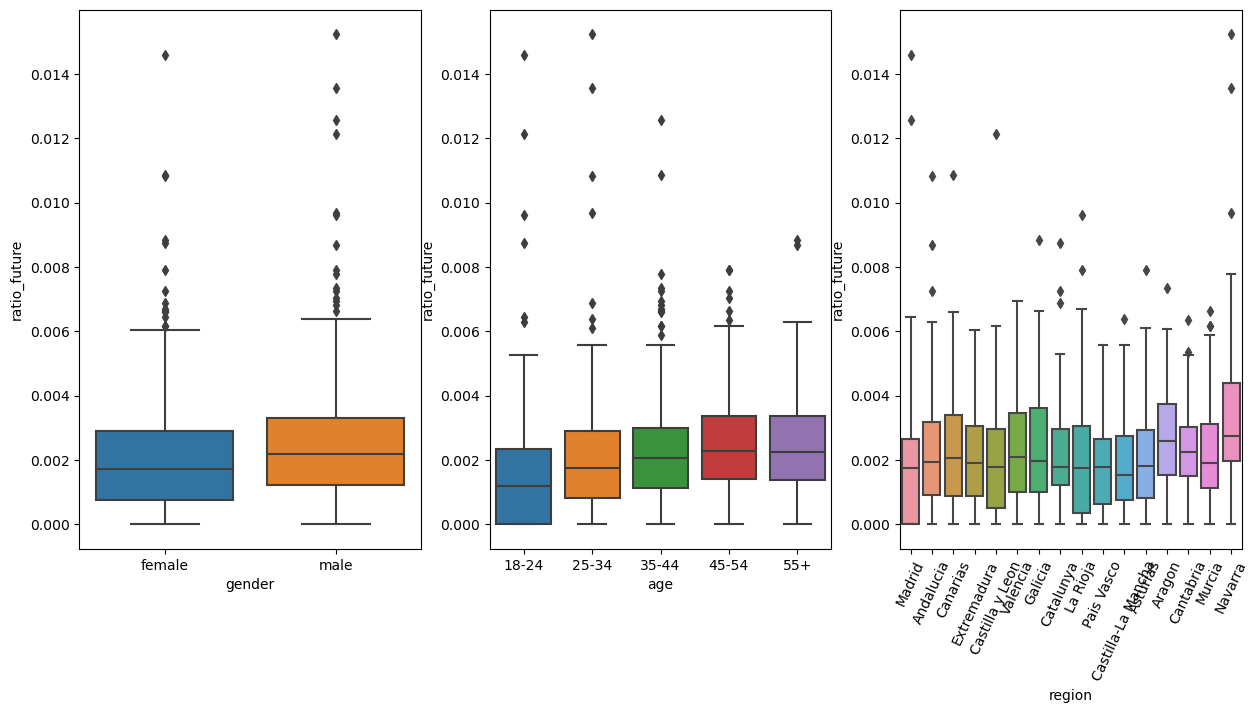

In [89]:
# remove outliers
#data = remove_outliers(data,column='num_future',value=10)
# boxplot
box_plot('ratio_future',data)
# statistics
statistics('ratio_future',data)

### 11. Ratio of conjunctions

In [90]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'ratio_conj')
print(res)

MannwhitneyuResult(statistic=157123.0, pvalue=0.24087187622682882)


In [91]:
# Kruskal-Wallis test
kruskal_posthoc(df,'ratio_conj')


AGE: KruskalResult(statistic=2.4835929657789366, pvalue=0.6475761169620493)
AGE:        18-24  25-34  35-44  45-54  55+
18-24    1.0    1.0    1.0    1.0  1.0
25-34    1.0    1.0    1.0    1.0  1.0
35-44    1.0    1.0    1.0    1.0  1.0
45-54    1.0    1.0    1.0    1.0  1.0
55+      1.0    1.0    1.0    1.0  1.0
REGION: KruskalResult(statistic=18.073445415509724, pvalue=0.25882400723577)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0     1.000000       1.0              1.0   
Andalucia              1.0        1.0     1.000000       1.0              1.0   
Extremadura            1.0        1.0     1.000000       1.0              1.0   
Canarias               1.0        1.0     1.000000       1.0              1.0   
Castilla y Leon        1.0        1.0     1.000000       1.0              1.0   
Valencia               1.0        1.0     1.000000       1.0              1.0   
Galicia                1.0       

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.08448777450004451
The f of Cohen for age is: 0.0005217696112136983
The f of Cohen normalized for age is: 0.3366365467128035
The f of Cohen for demography is: 0.0014648598365913108
The f of Cohen normalized for demography is: 0.27286481600428975


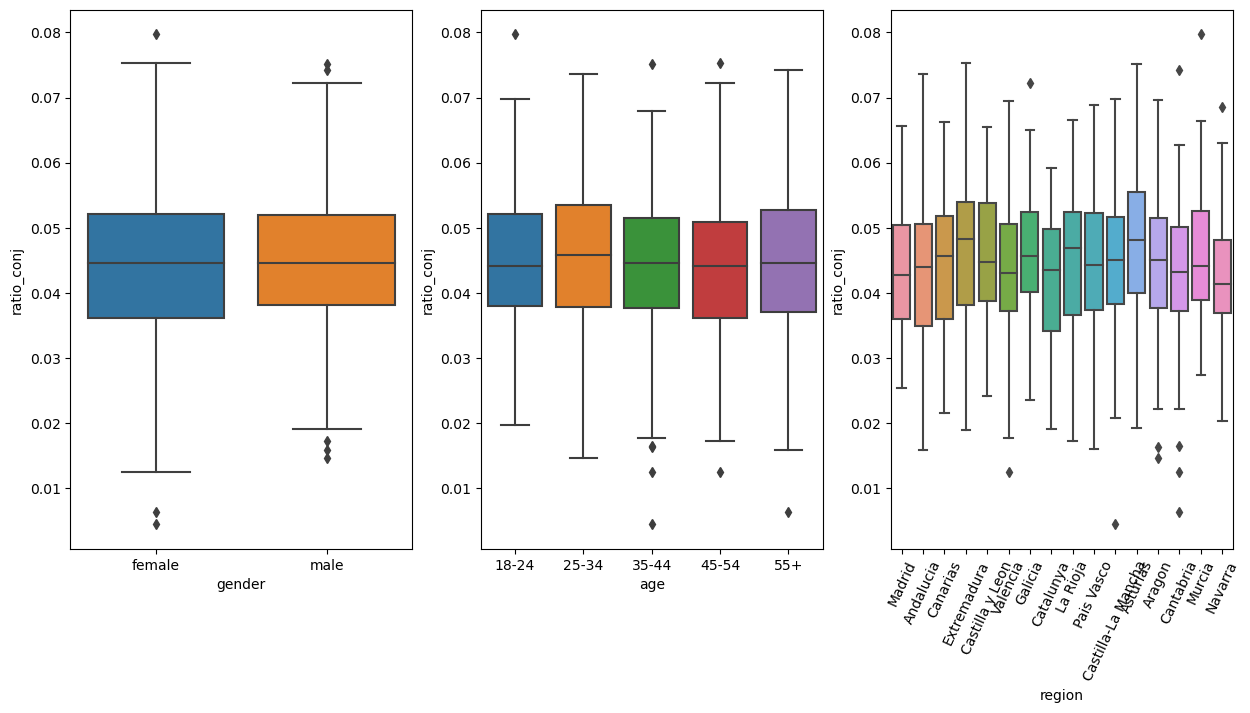

In [92]:
# remove outliers
#data = remove_outliers(data,column='num_conj',value=200)
# boxplot
box_plot('ratio_conj',data)
# statistics
statistics('ratio_conj',data)

#### Conclusions
- The variables *gender* and *number of conjunctions* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see how males users use more conjunctions than females. 
- The variables *age* and *number of conjunctions* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is above 0.3 and in the plots we can observe how the eldest users boxes (>35) use more conjunctions than the youngest. 
- The variables *demography* and *number of conjunctions* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is close to 0.3, but smaller than the latter. We can also see in the box plot that users from *Extremadura or Cantabria* use more conjunctions than the ones from *Madrid, Valencia or Andalucia*

## WORD FEATURES ANALYSIS: 

1. Count of words
2. Count of positive words
3. Count of negative words
4. Unique words count
5. Count of words that occur twice
6. Average word length
7. Maximum length of a word
8. Count of words with numbers
9. Count of words with length greater than 6
10. Count of words with length smaller than 3
11. Count of stop words

#### Steps:

- Create boxplots to visualize independence between studied features and the users personal traits (gender, age and demography)
- Statistical measures: d of Cohen for traits with only 2 options, f of Cohen for traits with more than 2 possibilities.
The d of Cohen can be either positive or negative. Two variables are considered independant when the absolute value of d is 0 or very close to 0, and as the absolute value of d gets bigger, the relationship between the variables becomes stronger. Normaly, when the value is below 0.2 the dependency between the variables is considered small, when it is around 0.5 it's considered moderate, and the dependency is big when the value is greater than 0.8. These measures apply as well for the f of Cohen normilized. This measure is calculated dividing the f of Cohen between the difference of the max and min values of the groups of each of the studied features.

### SENTIMENT ANALYSIS FOR COUNT OF POSITIVE AND NEGATIVE WORDS: 

We are going to use a file from the NRC Association http://saifmohammad.com which indicates if a word is positive or negative, and the corresponding emotions associated to it. The emotions are anger, anticipation, disgust, fear, joy, sadness, surprise and trust. If the word isn't classified as positive or negative, we will classify it based on the emotion: if anger, disgust, fear or sadness we'll classify it as negative; if joy or trust we'll classify it as positive.

In [95]:
sent_analysis_data = pd.read_csv('../../Spanish-NRC-EmoLex.txt',sep='\t')
sent_analysis_data.head()

,English Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Spanish Word
0,aback,0,0,0,0,0,0,0,0,0,0,detrás
1,abacus,0,0,0,0,0,0,0,0,0,1,ábaco
2,abandon,0,0,0,1,0,1,0,1,0,0,abandonar
3,abandoned,1,0,0,1,0,1,0,1,0,0,abandonado
4,abandonment,1,0,0,1,0,1,0,1,1,0,abandono


In [103]:
spanish_dict = [normalize(w) for w in list(sent_analysis_data['Spanish Word'])]
sent_analysis_data['spanish_without_accent'] = spanish_dict
sent_analysis_data.head()

,English Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Spanish Word,spanish_without_accent
0,aback,0,0,0,0,0,0,0,0,0,0,detrás,detras
1,abacus,0,0,0,0,0,0,0,0,0,1,ábaco,abaco
2,abandon,0,0,0,1,0,1,0,1,0,0,abandonar,abandonar
3,abandoned,1,0,0,1,0,1,0,1,0,0,abandonado,abandonado
4,abandonment,1,0,0,1,0,1,0,1,1,0,abandono,abandono


In [104]:
def sent_analysis(word):
    columns = sent_analysis_data.keys()
    negative = ['negative','fear','anger','disgust','sadness']
    positive = ['positive','joy','trust']

    row = sent_analysis_data.loc[sent_analysis_data['spanish_without_accent'] == word]
    cols = np.where(row == 1)
    attributes = [columns[i] for i in cols]

    intersection_neg = list(set(negative) & set(attributes[0]))
    intersection_pos = list(set(positive) & set(attributes[0]))

    if len(intersection_neg) != 0:
        if len(intersection_pos) != 0:
            return 'Both'
        else:
            return 'Negative'
    elif len(intersection_pos) != 0:
        return 'Positive'

    return None

In [97]:
# returns a list of words that occur exactly 'num' times or None if no coincidence
def num_occurences(lista,num):
    aux_dict = {}
    for item in lista:
        if item in aux_dict.keys():
            aux_dict[item] += 1
        else:
            aux_dict[item] = 1

    try:
        idx = list(aux_dict.values()).index(num)
        words = list(aux_dict.keys())[idx]
        return len(words)
    except:
        return 0

In [105]:
# load data for character based features analysis
def df_word_based():

    data = pd.read_excel('../cleaned_users.xlsx')
    username_list = data['username']

    # load spanish stop words
    stop_words_df = pd.read_csv('../../spanish-stop-words.txt',header=None)
    stop_words = [normalize(w) for w in list(stop_words_df[0])]

    num_words = []
    num_pos_words = []
    num_neg_words = []
    num_unique = []
    num_eng = []
    num_twice = []
    av_length = []
    max_length = []
    num_numbers = []
    num_greater = []
    num_smaller = []
    num_stop = []

    i = 0
    for username in username_list:
        with open(f'../Cleaned Documents/{username}.txt','r') as f:
            text = f.read()
            # remove punctuation
            text = text.translate(str.maketrans('','',string.punctuation))
            sentences = text.split('\n')
            words = []
            for sentence in sentences:
                words += sentence.split(' ')
            words = [w for w in words if len(w) != 0]
            words_lower = [w.lower() for w in words if len(w) != 0]

            num_words.append(len(words))

            # sentiment analysis
            pos = 0
            neg = 0
            for word in words:
                sentiment = sent_analysis(word)
                if sentiment == 'Both':
                    neg += 1
                    pos += 1
                elif sentiment == 'Positive':
                    pos += 1
                elif sentiment == 'Negative':
                    neg += 1

            num_pos_words.append(pos)
            num_neg_words.append(neg)

            # unique words
            num_unique.append(num_occurences(words,1))
            # twice occurrences
            num_twice.append(num_occurences(words,2))
            
            # max, av, >6, <3 length and num words with digits, count english words
            max_len = 0
            sum_length = 0
            digits = 0
            len_greater = 0
            len_smaller = 0
            for word in words:
                sum_length += len(word)
                if len(word) > max_len:
                    max_len = len(word)

                if len(re.findall('\d',word)) > 0:
                    digits += 1

                if len(word) > 6:
                    len_greater += 1
                elif len(word) < 3:
                    len_smaller += 1
            
            av_length.append(sum_length/len(words))
            max_length.append(max_len)
            num_numbers.append(digits)
            num_greater.append(len_greater)
            num_smaller.append(len_smaller)

            # count english
            intersection_eng = list(set(english_dict.words()) & set(words_lower))
            num_eng.append(len(intersection_eng))

            # count stop-words 
            intersection_stop = list(set(stop_words) & set(words_lower))
            num_stop.append(len(intersection_stop))

        print(f'User {i+1} of {len(username_list)}')
        i += 1


    data['num_words'] = num_words
    data['num_pos_words'] = num_pos_words
    data['num_neg_words'] = num_neg_words
    data['num_unique'] = num_unique
    data['num_eng'] = num_eng
    data['num_twice'] = num_twice
    data['av_length'] = av_length
    data['max_length'] = max_length
    data['num_numbers'] = num_numbers
    data['num_greater'] = num_greater
    data['num_smaller'] = num_smaller
    data['num_stop'] = num_stop

    return data         

In [106]:
data = df_word_based()
data.head()

User 1 of 1146
User 2 of 1146
User 3 of 1146
User 4 of 1146
User 5 of 1146
User 6 of 1146
User 7 of 1146
User 8 of 1146
User 9 of 1146
User 10 of 1146
User 11 of 1146
User 12 of 1146
User 13 of 1146
User 14 of 1146
User 15 of 1146
User 16 of 1146
User 17 of 1146
User 18 of 1146
User 19 of 1146
User 20 of 1146
User 21 of 1146
User 22 of 1146
User 23 of 1146
User 24 of 1146
User 25 of 1146
User 26 of 1146
User 27 of 1146
User 28 of 1146
User 29 of 1146
User 30 of 1146
User 31 of 1146
User 32 of 1146
User 33 of 1146
User 34 of 1146
User 35 of 1146
User 36 of 1146
User 37 of 1146
User 38 of 1146
User 39 of 1146
User 40 of 1146
User 41 of 1146
User 42 of 1146
User 43 of 1146
User 44 of 1146
User 45 of 1146
User 46 of 1146
User 47 of 1146
User 48 of 1146
User 49 of 1146
User 50 of 1146
User 51 of 1146
User 52 of 1146
User 53 of 1146
User 54 of 1146
User 55 of 1146
User 56 of 1146
User 57 of 1146
User 58 of 1146
User 59 of 1146
User 60 of 1146
User 61 of 1146
User 62 of 1146
User 63 of 1146
U

,username,gender,age,region,num_words,num_pos_words,num_neg_words,num_unique,num_eng,num_twice,av_length,max_length,num_numbers,num_greater,num_smaller,num_stop
0,lozanogarcia68,female,55+,Madrid,868,0,43,6,73,4,5.104839,21,13,237,241,131
1,beltrangmodet,male,18-24,Madrid,101,0,3,6,27,4,4.316832,15,1,17,24,32
2,edubellver,male,18-24,Madrid,149,0,10,2,31,4,4.557047,14,0,29,28,46
3,luss_27,female,18-24,Madrid,1137,0,52,5,93,3,4.766931,44,2,228,332,148
4,k15ce,male,25-34,Madrid,1179,0,68,4,85,5,4.737913,45,8,263,366,151


### 1. Number of words

In [107]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_words')
print(res)

MannwhitneyuResult(statistic=133758.0, pvalue=8.808239390610327e-08)


In [108]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_words')


AGE: KruskalResult(statistic=292.2176556570143, pvalue=5.168696739256514e-62)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.314637e-15  2.657629e-34  6.818065e-44  1.855072e-51
25-34  1.314637e-15  1.000000e+00  8.741449e-05  4.679471e-08  4.068669e-12
35-44  2.657629e-34  8.741449e-05  1.000000e+00  1.919906e-01  9.702528e-03
45-54  6.818065e-44  4.679471e-08  1.919906e-01  1.000000e+00  1.919906e-01
55+    1.855072e-51  4.068669e-12  9.702528e-03  1.919906e-01  1.000000e+00
REGION: KruskalResult(statistic=61.60204947838972, pvalue=1.3348564376174905e-07)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.140371     1.000000  0.536101   
Andalucia           0.140371   1.000000     1.000000  1.000000   
Extremadura         1.000000   1.000000     1.000000  1.000000   
Canarias            0.536101   1.000000     1.000000  1.000000   
Castilla y Leon     0.000040   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.319005629876635
The f of Cohen for age is: 414.3537613802351
The f of Cohen normalized for age is: 0.3317312690577027
The f of Cohen for demography is: 199.74151906361212
The f of Cohen normalized for demography is: 0.2613902844282346


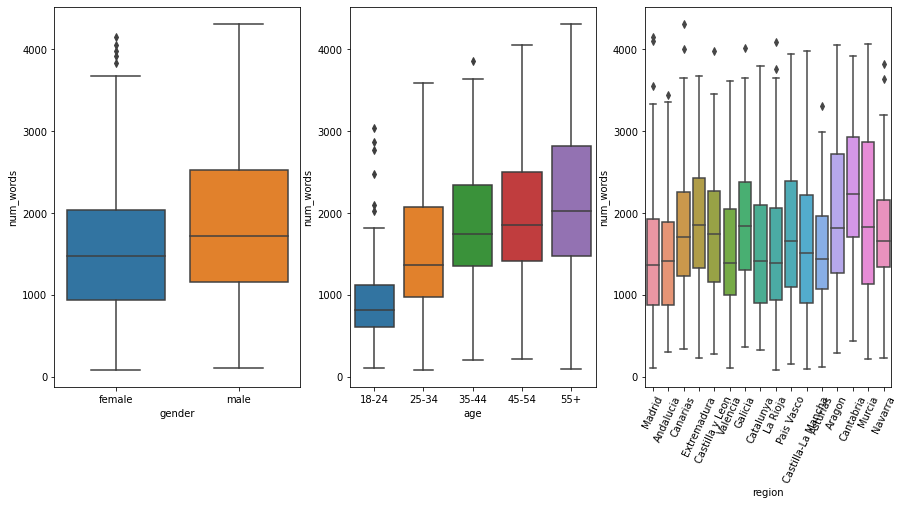

In [310]:
# remove outliers
#data = remove_outliers(data,column='num_conj',value=200)
# boxplot
box_plot('num_words',data)
# statistics
statistics('num_words',data)

#### Conclusions
- The variables *gender* and *number of words* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see how males users use more words than females. 
- The variables *age* and *number of words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>35) use more words than the youngest. 
- The variables *demography* and *number of words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is slightly above 0.2, and we can see how users from *Cantabria* use more words than users from *La Rioja, Madrid or Andalucia*

### 2. Number of positive words

In [109]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_pos_words')
print(res)

MannwhitneyuResult(statistic=182479.5, pvalue=0.0001513600867339895)


In [110]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_pos_words')


AGE: KruskalResult(statistic=9.670543300622803, pvalue=0.0463584900876099)
AGE:           18-24  25-34     35-44     45-54       55+
18-24  1.000000    1.0  0.153328  0.048637  0.153328
25-34  1.000000    1.0  1.000000  1.000000  1.000000
35-44  0.153328    1.0  1.000000  1.000000  1.000000
45-54  0.048637    1.0  1.000000  1.000000  1.000000
55+    0.153328    1.0  1.000000  1.000000  1.000000
REGION: KruskalResult(statistic=17.124849636530524, pvalue=0.31145584875997206)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0          1.0       1.0              1.0   
Andalucia              1.0        1.0          1.0       1.0              1.0   
Extremadura            1.0        1.0          1.0       1.0              1.0   
Canarias               1.0        1.0          1.0       1.0              1.0   
Castilla y Leon        1.0        1.0          1.0       1.0              1.0   
Valencia               1.0  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.17136354433145085
The f of Cohen for age is: 14.640644925828749
The f of Cohen normalized for age is: 0.33445507236158667
The f of Cohen for demography is: 7.24583024424322
The f of Cohen normalized for demography is: 0.2484841620662173


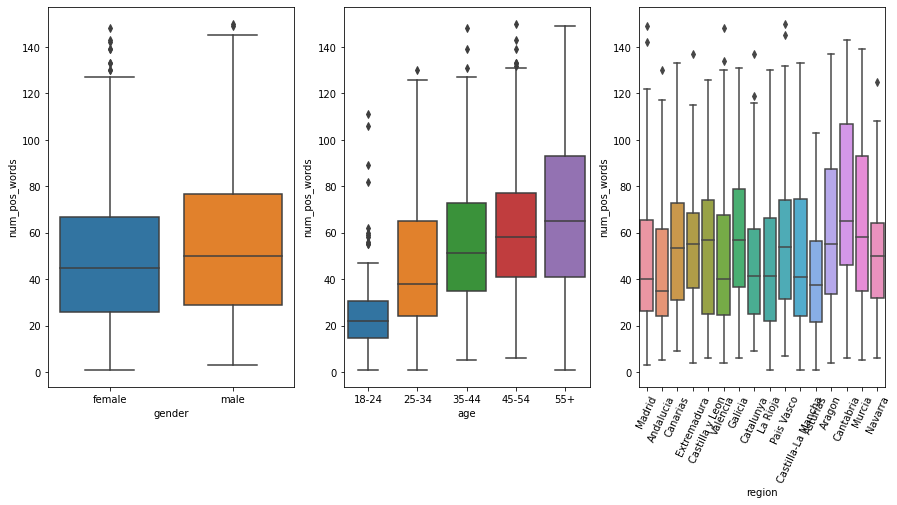

In [312]:
# remove outliers
data = remove_outliers(data,column='num_pos_words',value=150)
# boxplot
box_plot('num_pos_words',data)
# statistics
statistics('num_pos_words',data)

#### Conclusions
- The variables *gender* and *number of positive words* have ***LOW DEPENDENCY***: the statistical measure, d of Cohen, is below 0.2 and we can see how the box plots are similar 
- The variables *age* and *number of positive words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>35) use more positive words than the youngest. 
- The variables *demography* and *number of positive words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is slightly above 0.2, and we can see how users from *Cantabria* use more positive words than users from *Castilla-La Mancha, Madrid or Andalucia*

### 3. Number of negative words

In [111]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_neg_words')
print(res)

MannwhitneyuResult(statistic=131315.0, pvalue=7.175929862628541e-09)


In [112]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_neg_words')


AGE: KruskalResult(statistic=138.54456575035243, pvalue=5.783807908832918e-29)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  3.359008e-10  6.212477e-18  8.899472e-20  1.726350e-26
25-34  3.359008e-10  1.000000e+00  8.258339e-02  4.598210e-02  7.729900e-05
35-44  6.212477e-18  8.258339e-02  1.000000e+00  8.295160e-01  1.192161e-01
45-54  8.899472e-20  4.598210e-02  8.295160e-01  1.000000e+00  1.192161e-01
55+    1.726350e-26  7.729900e-05  1.192161e-01  1.192161e-01  1.000000e+00
REGION: KruskalResult(statistic=38.465825194281095, pvalue=0.0007697224594768042)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000    1.00000          1.0   1.00000   
Andalucia           1.000000    1.00000          1.0   1.00000   
Extremadura         1.000000    1.00000          1.0   1.00000   
Canarias            1.000000    1.00000          1.0   1.00000   
Castilla y Leon     0.375806    1.00000 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.3241721543861333
The f of Cohen for age is: 7.0086134562510605
The f of Cohen normalized for age is: 0.321543690732698
The f of Cohen for demography is: 4.747234434685081
The f of Cohen normalized for demography is: 0.2647330340770963


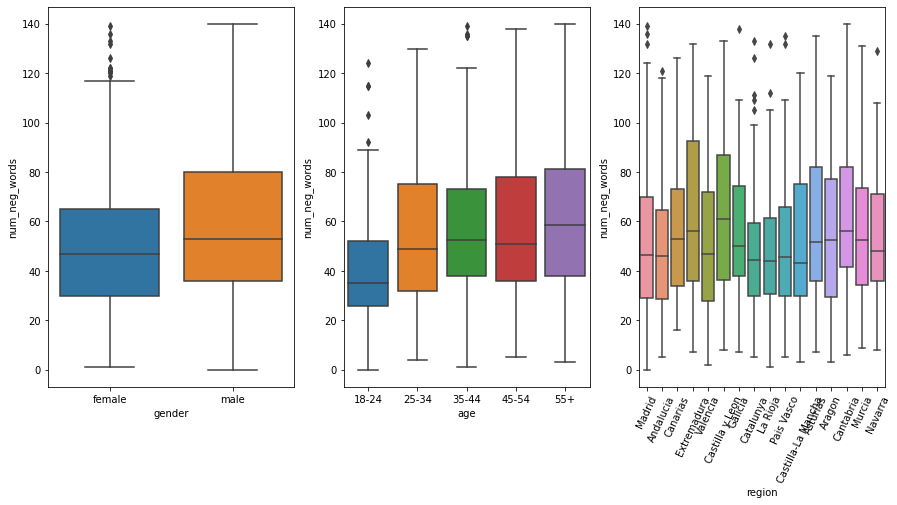

In [351]:
# remove outliers
data = remove_outliers(data,column='num_neg_words',value=140)
# boxplot
box_plot('num_neg_words',data)
# statistics
statistics('num_neg_words',data)

#### Conclusions
- The variables *gender* and *number of negative words* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see how the male users use more negative words than the females
- The variables *age* and *number of negative words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>25) use more negative words than the youngest. 
- The variables *demography* and *number of negative words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is slightly above 0.2, and we can see how users from *Castilla y Leon* use more negative words than users from *La Rioja*

### 4. Unique words count

In [113]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_unique')
print(res)

MannwhitneyuResult(statistic=147941.0, pvalue=0.0046055595103041734)


In [114]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_unique')


AGE: KruskalResult(statistic=9.717513137545193, pvalue=0.04546469549808792)
AGE:           18-24     25-34     35-44     45-54       55+
18-24  1.000000  1.000000  1.000000  0.212118  0.191874
25-34  1.000000  1.000000  1.000000  0.403682  0.375997
35-44  1.000000  1.000000  1.000000  0.594256  0.585063
45-54  0.212118  0.403682  0.594256  1.000000  1.000000
55+    0.191874  0.375997  0.585063  1.000000  1.000000
REGION: KruskalResult(statistic=22.749879193728063, pvalue=0.08959669423273572)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0          1.0  1.000000              1.0   
Andalucia              1.0        1.0          1.0  1.000000              1.0   
Extremadura            1.0        1.0          1.0  1.000000              1.0   
Canarias               1.0        1.0          1.0  1.000000              1.0   
Castilla y Leon        1.0        1.0          1.0  1.000000              1.0   
Valencia 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.1817767097467826
The f of Cohen for age is: 0.23312282915003865
The f of Cohen normalized for age is: 0.3962595235446747
The f of Cohen for demography is: 0.35841663693191494
The f of Cohen normalized for demography is: 0.3036863497281588


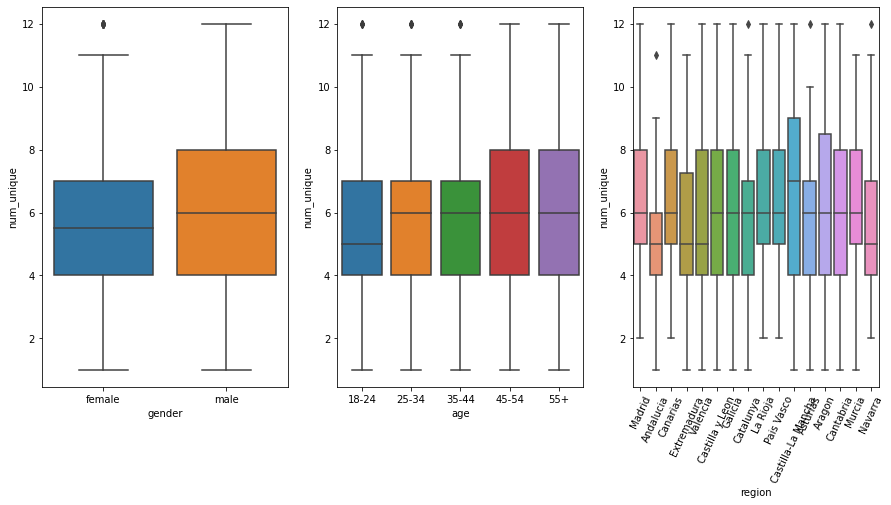

In [341]:
# remove outliers
data = remove_outliers(data,column='num_unique',value=12)
# boxplot
box_plot('num_unique',data)
# statistics
statistics('num_unique',data)

#### Conclusions
- The variables *gender* and *number of unique words* have ***MODERATE DEPENDENCY***: the statistical measure, d of Cohen, is slightly above 0.2 and we can see how the boxes are similar and the male users use more unique words than the females
- The variables *age* and *number of unique words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>25) use more unique words than the youngest. 
- The variables *demography* and *number of unique words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is slightly above 0.2, and we can see how users from *Castilla-La Mancha* use more negative words than users from *Andalucia or Navarra*

### 5. Number of words that occur twice

In [115]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_twice')
print(res)

MannwhitneyuResult(statistic=158735.0, pvalue=0.3720912858203067)


In [116]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_twice')


AGE: KruskalResult(statistic=31.412168621401577, pvalue=2.5223707430223672e-06)
AGE:           18-24     25-34     35-44     45-54       55+
18-24  1.000000  0.252587  0.008577  0.000013  0.000045
25-34  0.252587  1.000000  0.528547  0.023328  0.042352
35-44  0.008577  0.528547  1.000000  0.477347  0.528547
45-54  0.000013  0.023328  0.477347  1.000000  0.861637
55+    0.000045  0.042352  0.528547  0.861637  1.000000
REGION: KruskalResult(statistic=25.422436635046267, pvalue=0.04454989803484836)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0          1.0       1.0              1.0   
Andalucia              1.0        1.0          1.0       1.0              1.0   
Extremadura            1.0        1.0          1.0       1.0              1.0   
Canarias               1.0        1.0          1.0       1.0              1.0   
Castilla y Leon        1.0        1.0          1.0       1.0              1.0   
Valen

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.09070376049160099
The f of Cohen for age is: 0.4130635450834423
The f of Cohen normalized for age is: 0.3315132109481741
The f of Cohen for demography is: 0.42688085129094716
The f of Cohen normalized for demography is: 0.27333533483565087


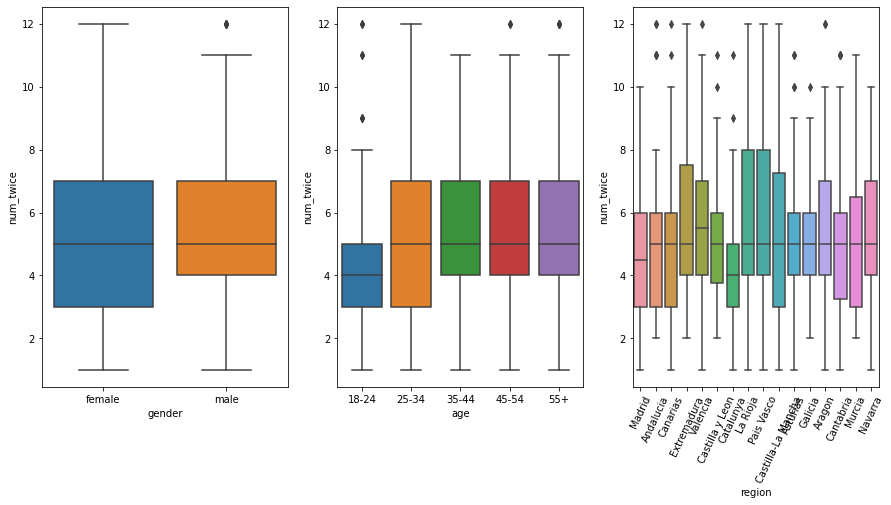

In [353]:
# remove outliers
data = remove_outliers(data,column='num_twice',value=12)
# boxplot
box_plot('num_twice',data)
# statistics
statistics('num_twice',data)

#### Conclusions
- The variables *gender* and *number of words that occur twice* are ***INDEPENDENT***: the statistical measure, d of Cohen, is very close to 0 and the box plots are practically identical
- The variables *age* and *number of words that occur twice* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>25) use more unique words than the youngest. 
- The variables *demography* and *number of words that occur twice* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is slightly above 0.2, and we can see how users from *Valencia* use more negative words than users from *Catalunya*

### 6. Average word length

In [117]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'av_length')
print(res)

MannwhitneyuResult(statistic=201453.0, pvalue=1.4600690998477546e-11)


In [118]:
# Kruskal-Wallis test
kruskal_posthoc(df,'av_length')


AGE: KruskalResult(statistic=122.0048710988417, pvalue=1.9924508079277101e-25)
AGE:               18-24     25-34         35-44         45-54           55+
18-24  1.000000e+00  0.000023  2.634635e-18  3.416590e-21  9.083857e-14
25-34  2.332831e-05  1.000000  3.413393e-05  2.220987e-06  6.233241e-03
35-44  2.634635e-18  0.000034  1.000000e+00  6.391888e-01  3.320578e-01
45-54  3.416590e-21  0.000002  6.391888e-01  1.000000e+00  1.699012e-01
55+    9.083857e-14  0.006233  3.320578e-01  1.699012e-01  1.000000e+00
REGION: KruskalResult(statistic=36.627767201085135, pvalue=0.001433876532382719)
REGION:                      Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.00000   1.000000     0.418610  1.000000   
Andalucia           1.00000   1.000000     0.105073  1.000000   
Extremadura         0.41861   0.105073     1.000000  0.000543   
Canarias            1.00000   1.000000     0.000543  1.000000   
Castilla y Leon     1.00000   1.000000     0.002327  1.000000   
Valen

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.35175499575559654
The f of Cohen for age is: 0.16970876305164
The f of Cohen normalized for age is: 0.35629711491991123
The f of Cohen for demography is: 0.08758846106093993
The f of Cohen normalized for demography is: 0.2650940640398035


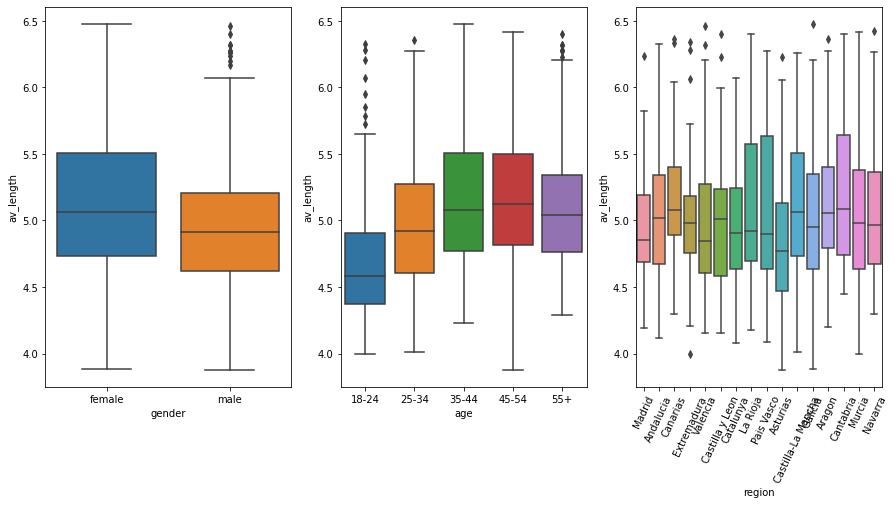

In [355]:
# remove outliers
data = remove_outliers(data,column='av_length',value=6.5)
# boxplot
box_plot('av_length',data)
# statistics
statistics('av_length',data)

#### Conclusions
- The variables *gender* and *average word length* have ***MODERATE DEPENDANCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see in the box plots how the female users use longer words.
- The variables *age* and *average word length* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the medium age users (35-54) use longer words. 
- The variables *demography* and *average word length* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is slightly above 0.2, and we can see how users from *Cantabria or Aragon* use longer words than users from *Asturias*

### 7. Max word length

In [119]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'max_length')
print(res)

MannwhitneyuResult(statistic=190653.5, pvalue=1.3934779751489272e-06)


In [120]:
# Kruskal-Wallis test
kruskal_posthoc(df,'max_length')


AGE: KruskalResult(statistic=27.95027352670745, pvalue=1.2765740655149103e-05)
AGE:           18-24     25-34     35-44     45-54       55+
18-24  1.000000  0.012731  0.011500  0.006778  1.000000
25-34  0.012731  1.000000  1.000000  1.000000  0.003582
35-44  0.011500  1.000000  1.000000  1.000000  0.002762
45-54  0.006778  1.000000  1.000000  1.000000  0.001207
55+    1.000000  0.003582  0.002762  0.001207  1.000000
REGION: KruskalResult(statistic=21.2129182842713, pvalue=0.13016333902862987)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0        1.0     1.000000       1.0         1.000000   
Andalucia              1.0        1.0     1.000000       1.0         1.000000   
Extremadura            1.0        1.0     1.000000       1.0         0.892555   
Canarias               1.0        1.0     1.000000       1.0         1.000000   
Castilla y Leon        1.0        1.0     0.892555       1.0         1.000000   
Valencia

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.24008228857224337
The f of Cohen for age is: 1.3804352452333757
The f of Cohen normalized for age is: 0.40293482948863896
The f of Cohen for demography is: 1.2254932610228964
The f of Cohen normalized for demography is: 0.3161665988339757


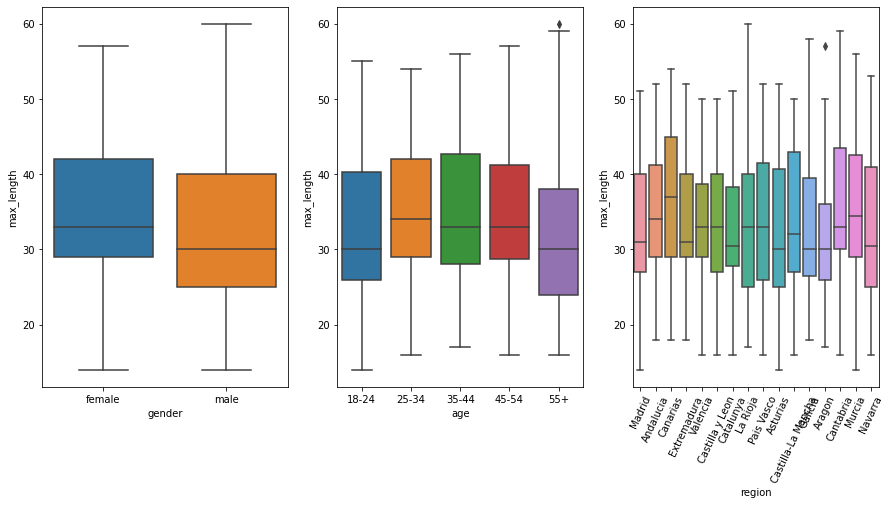

In [357]:
# remove outliers
data = remove_outliers(data,column='max_length',value=60)
# boxplot
box_plot('max_length',data)
# statistics
statistics('max_length',data)

#### Conclusions
- The variables *gender* and *max word length* have ***MODERATE DEPENDANCY***: the statistical measure, d of Cohen, is slightly above 0.2  and we can see in the box plots how the female users use longer words.
- The variables *age* and *max word length* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the medium age users (25-54) use longer words. 
- The variables *demography* and *max word length* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5, and we can see how users from *Canarias* use longer words than users from *Aragon or Galicia*

### 8. Count of words with numbers

In [121]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_numbers')
print(res)

MannwhitneyuResult(statistic=125571.5, pvalue=9.403729082146011e-12)


In [122]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_numbers')


AGE: KruskalResult(statistic=125.89624702202262, pvalue=2.936331729813732e-26)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  4.623628e-07  1.203980e-13  4.753450e-24  3.925019e-18
25-34  4.623628e-07  1.000000e+00  5.986780e-02  4.733125e-06  1.663189e-03
35-44  1.203980e-13  5.986780e-02  1.000000e+00  4.112180e-02  3.994182e-01
45-54  4.753450e-24  4.733125e-06  4.112180e-02  1.000000e+00  3.994182e-01
55+    3.925019e-18  1.663189e-03  3.994182e-01  3.994182e-01  1.000000e+00
REGION: KruskalResult(statistic=46.382763494298054, pvalue=4.620818116633044e-05)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.129630          1.0       1.0   
Andalucia           0.129630   1.000000          1.0       1.0   
Extremadura         1.000000   1.000000          1.0       1.0   
Canarias            1.000000   1.000000          1.0       1.0   
Castilla y Leon     0.133174   1.000000 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.39531332240764716
The f of Cohen for age is: 5.904247837449719
The f of Cohen normalized for age is: 0.3478548670808921
The f of Cohen for demography is: 3.264198197402803
The f of Cohen normalized for demography is: 0.30241836240643616


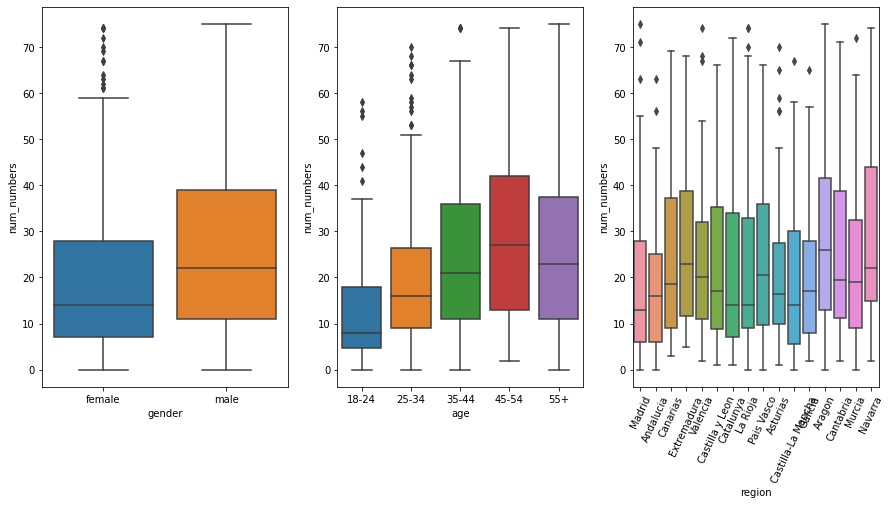

In [359]:
# remove outliers
data = remove_outliers(data,column='num_numbers',value=75)
# boxplot
box_plot('num_numbers',data)
# statistics
statistics('num_numbers',data)

#### Conclusions
- The variables *gender* and *words with numbers* have ***MODERATE DEPENDANCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see in the box plots how the male users use more words with numbers.
- The variables *age* and *words with numbers* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how users from 45-54 years use more words with numbers. 
- The variables *demography* and *words with numbers* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5, and we can see how users from *Aragon or Extremadura* use more words with numberss than users from *La Rioja or Catalunya*

### 9. Count of words with length greater than 6

In [123]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_greater')
print(res)

MannwhitneyuResult(statistic=144598.0, pvalue=0.0006451378490443577)


In [124]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_greater')


AGE: KruskalResult(statistic=378.7892599017467, pvalue=1.063192747037431e-80)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  3.655422e-16  2.971206e-43  6.317017e-56  7.087537e-64
25-34  3.655422e-16  1.000000e+00  3.972003e-08  2.583296e-13  4.304806e-18
35-44  2.971206e-43  3.972003e-08  1.000000e+00  2.069118e-01  4.813535e-03
45-54  6.317017e-56  2.583296e-13  2.069118e-01  1.000000e+00  2.069118e-01
55+    7.087537e-64  4.304806e-18  4.813535e-03  2.069118e-01  1.000000e+00
REGION: KruskalResult(statistic=71.60145085493971, pvalue=2.3125144760124005e-09)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.031680     1.000000  0.116407   
Andalucia           0.031680   1.000000     0.038729  1.000000   
Extremadura         1.000000   0.038729     1.000000  0.142491   
Canarias            0.116407   1.000000     0.142491  1.000000   
Castilla y Leon     0.000009   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.20179952677344928
The f of Cohen for age is: 136.81503435832852
The f of Cohen normalized for age is: 0.34750645992581436
The f of Cohen for demography is: 64.88189659160162
The f of Cohen normalized for demography is: 0.2737077998147893


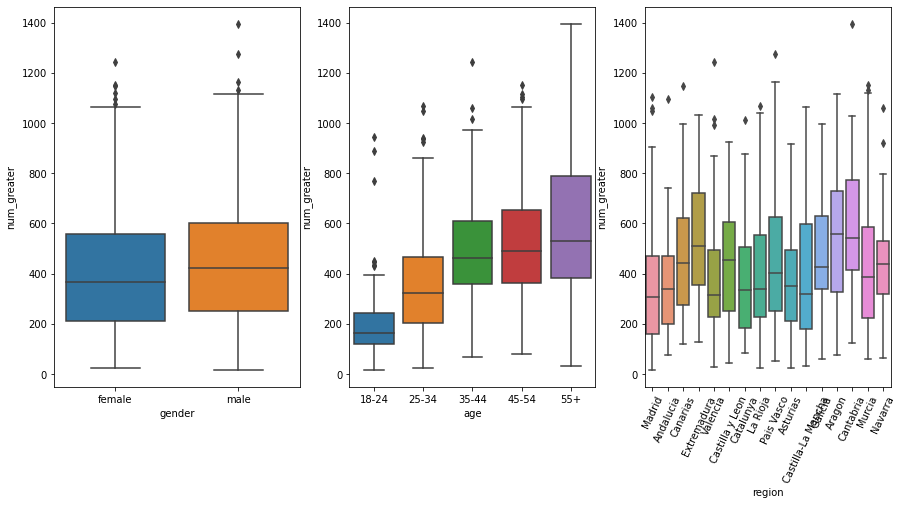

In [360]:
# remove outliers
#data = remove_outliers(data,column='num_numbers',value=75)
# boxplot
box_plot('num_greater',data)
# statistics
statistics('num_greater',data)

#### Conclusions
- The variables *gender* and *words with length greater than 6* have ***LOW DEPENDANCY***: the statistical measure, d of Cohen, is 0.2 and we can see how the boxes are very similar
- The variables *age* and *words with length greater than 6* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>35) years use more words with length > 6 than the youngest users. 
- The variables *demography* and *words with length greater than 6* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5, and we can see how users from *Aragon or Cantabria* use more words with length > 6 than users from *Castilla-La Mancha*

### 10. Count of words with length smaller than 3

In [125]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_smaller')
print(res)

MannwhitneyuResult(statistic=129533.0, pvalue=1.0277237007039853e-09)


In [126]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_smaller')


AGE: KruskalResult(statistic=242.32694405019203, pvalue=2.926267733805368e-51)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  8.589972e-14  4.694028e-27  1.075647e-35  1.195364e-44
25-34  8.589972e-14  1.000000e+00  3.419591e-03  6.774268e-06  2.100613e-10
35-44  4.694028e-27  3.419591e-03  1.000000e+00  1.520635e-01  3.419591e-03
45-54  1.075647e-35  6.774268e-06  1.520635e-01  1.000000e+00  8.939341e-02
55+    1.195364e-44  2.100613e-10  3.419591e-03  8.939341e-02  1.000000e+00
REGION: KruskalResult(statistic=60.42657748382619, pvalue=2.129900073905869e-07)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.171922      1.00000  0.681054   
Andalucia           0.171922   1.000000      1.00000  1.000000   
Extremadura         1.000000   1.000000      1.00000  1.000000   
Canarias            0.681054   1.000000      1.00000  1.000000   
Castilla y Leon     0.000034   1.000000  

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.3387418240755577
The f of Cohen for age is: 105.50804479336777
The f of Cohen normalized for age is: 0.3375643583461313
The f of Cohen for demography is: 55.25904013114447
The f of Cohen normalized for demography is: 0.25749930649725167


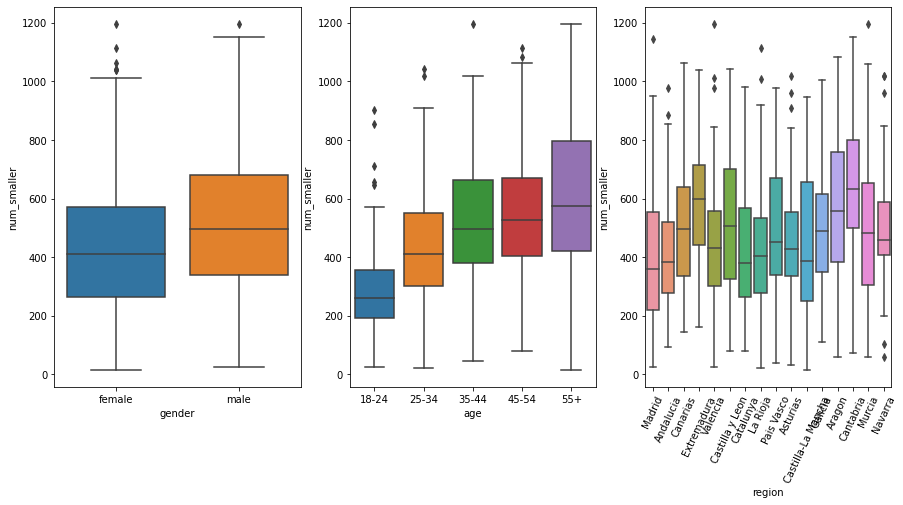

In [361]:
# remove outliers
#data = remove_outliers(data,column='num_numbers',value=75)
# boxplot
box_plot('num_smaller',data)
# statistics
statistics('num_smaller',data)

#### Conclusions
- The variables *gender* and *words with length smaller than 3* have ***MODERATE DEPENDANCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see how the male users use more words with length < 3 than the females.
- The variables *age* and *words with length greater than 6* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>35) years use more words with length < 3 than the youngest users. 
- The variables *demography* and *words with length greater than 6* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5, and we can see how users from *Extremadura or Cantabria* use more words with length < 3 than users from *Madrid or Andalucia*

### 11. Count of stop words

In [127]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'num_stop')
print(res)

MannwhitneyuResult(statistic=133906.0, pvalue=1.0181695489618383e-07)


In [128]:
# Kruskal-Wallis test
kruskal_posthoc(df,'num_stop')


AGE: KruskalResult(statistic=147.40840908684353, pvalue=7.31165547777955e-31)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  1.904908e-14  1.399644e-24  3.681134e-23  3.666249e-23
25-34  1.904908e-14  1.000000e+00  5.994472e-02  1.933127e-01  1.451549e-01
35-44  1.399644e-24  5.994472e-02  1.000000e+00  1.000000e+00  1.000000e+00
45-54  3.681134e-23  1.933127e-01  1.000000e+00  1.000000e+00  1.000000e+00
55+    3.666249e-23  1.451549e-01  1.000000e+00  1.000000e+00  1.000000e+00
REGION: KruskalResult(statistic=33.565829379557336, pvalue=0.003916774891409607)
REGION:                      Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.00000        1.0          1.0       1.0   
Andalucia           1.00000        1.0          1.0       1.0   
Extremadura         1.00000        1.0          1.0       1.0   
Canarias            1.00000        1.0          1.0       1.0   
Castilla y Leon     1.00000        1.0         

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:40: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:41: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60916/3604165633.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.2762604103272791
The f of Cohen for age is: 13.245549345390193
The f of Cohen normalized for age is: 0.36123969951846674
The f of Cohen for demography is: 7.196248979846503
The f of Cohen normalized for demography is: 0.24177747729160434


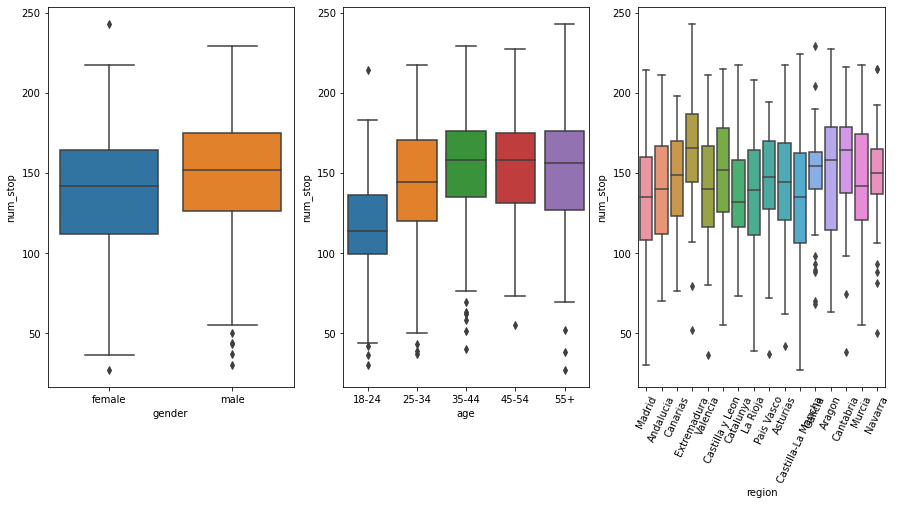

In [363]:
# remove outliers
#data = remove_outliers(data,column='num_numbers',value=75)
# boxplot
box_plot('num_stop',data)
# statistics
statistics('num_stop',data)

#### Conclusions
- The variables *gender* and *stop-words* have ***MODERATE DEPENDANCY***: the statistical measure, d of Cohen, is between 0.2 and 0.5 and we can see how the male users use more stop words than the females.
- The variables *age* and *stop-words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5 and we can see how the eldest users (>35) years use more stop words than the youngest users. 
- The variables *demography* and *stop-words* have ***MODERATE DEPENDENCY***: the f of Cohen normalized is between 0.2 and 0.5, and we can see how users from *Extremadura* use more stop words than users from *Catalunya*